In [20]:
from src.data import gedi_pipeline

import seaborn as sns
from fastai.tabular.all import save_pickle, load_pickle
import matplotlib.pyplot as plt
palette = sns.color_palette("Set2")

sns.set_theme()

In [2]:
gedi_burned, gedi_unburned = gedi_pipeline.load_stage_11()

In [4]:
gedi_burned.columns

Index(['shot_number', 'beam_type', 'absolute_time', 'longitude', 'latitude',
       'elevation_difference_tdx', 'agbd', 'agbd_se', 'fhd_normal', 'pai',
       'pai_z', 'pavd_z', 'rh_98', 'rh_70', 'rh_50', 'rh_25', 'cover',
       'cover_z', 'sensitivity_a0', 'solar_elevation', 'gridded_pft_class',
       'geometry', 'gedi_year', 'gedi_month', 'severity', 'burn_year',
       'burn_count', 'time_since_burn', 'aspect_2x2', 'aspect_mean',
       'aspect_std', 'aspect_median', 'elevation_2x2', 'elevation_mean',
       'elevation_std', 'elevation_median', 'slope_2x2', 'slope_mean',
       'slope_std', 'slope_median', 'soil_2x2', 'soil_mean', 'soil_std',
       'soil_median', 'SR_B1_2x2', 'SR_B1_mean', 'SR_B1_std', 'SR_B1_median',
       'SR_B2_2x2', 'SR_B2_mean', 'SR_B2_std', 'SR_B2_median', 'SR_B3_2x2',
       'SR_B3_mean', 'SR_B3_std', 'SR_B3_median', 'SR_B4_2x2', 'SR_B4_mean',
       'SR_B4_std', 'SR_B4_median', 'SR_B5_2x2', 'SR_B5_mean', 'SR_B5_std',
       'SR_B5_median', 'SR_B6_2x2', '

### Exploring filtering unburned shots

8024068
Share of samples with heterogenous land cover: 0.10558310323392076


<AxesSubplot: xlabel='dw_land_cover_std', ylabel='Count'>

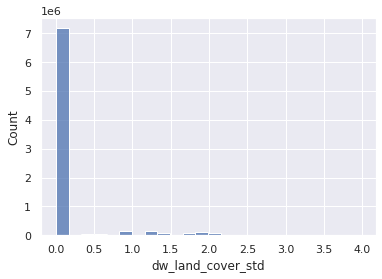

In [3]:
print(len(gedi_unburned))
print(f"Share of samples with heterogenous land cover: {len(gedi_unburned[gedi_unburned.dw_land_cover_std != 0])/len(gedi_unburned)}")
sns.histplot(gedi_unburned, x="dw_land_cover_std")

In [5]:
# Renove shots that fall inside a heterogeneous land cover.
gedi_unburned_p = gedi_unburned[gedi_unburned.dw_land_cover_std == 0]

<AxesSubplot: xlabel='dw_land_cover_median', ylabel='Count'>

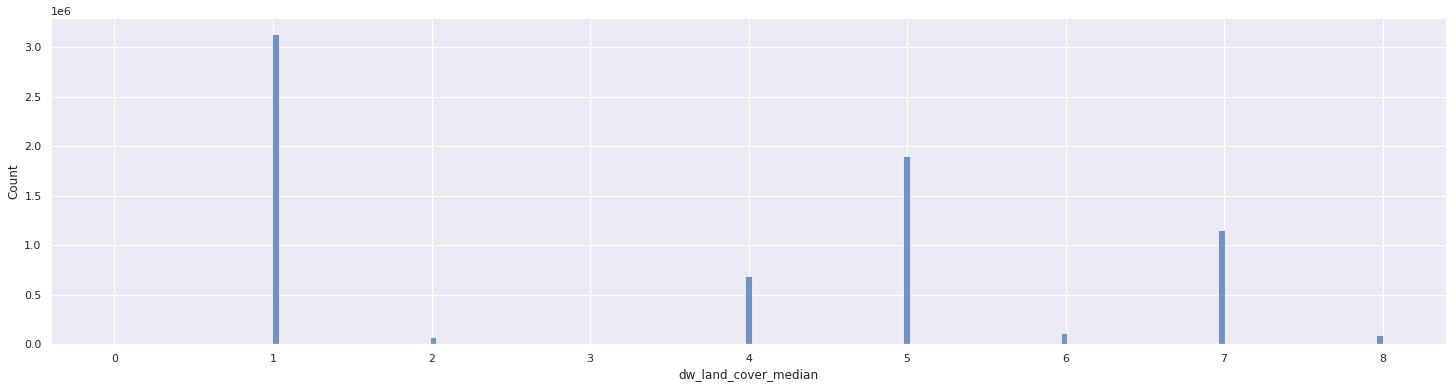

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.histplot(gedi_unburned_p, x="dw_land_cover_median")
# 1 = trees
# 2 = grass
# 4 = crops
# 5 = shrub_and_scrub
# 6 = built
# 7 = bare
# 8 = snow_and_ice

<AxesSubplot: xlabel='dw_land_cover_median', ylabel='agbd'>

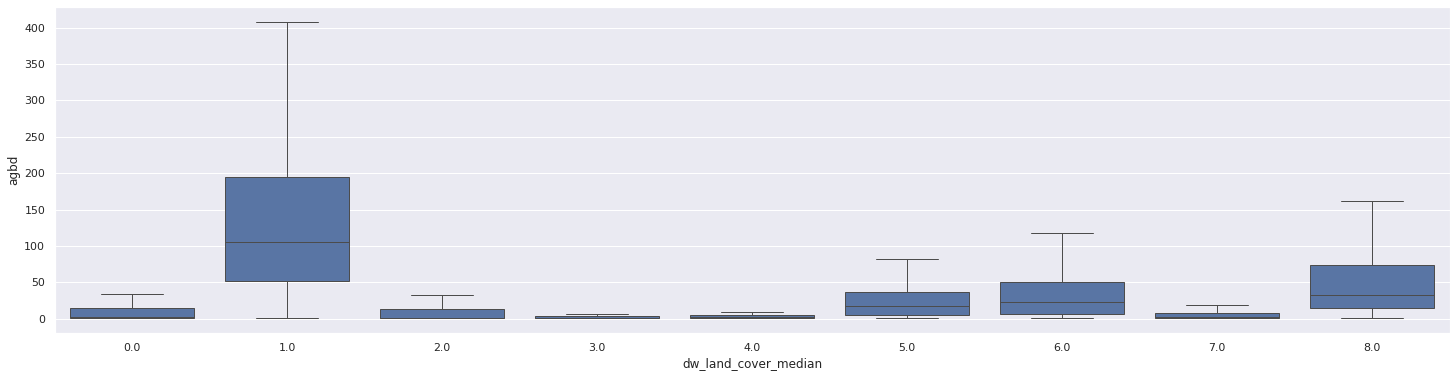

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.boxplot(gedi_unburned_p, y="agbd", showfliers=False, x="dw_land_cover_median")

<AxesSubplot: xlabel='dw_land_cover_median', ylabel='NDVI_mean'>

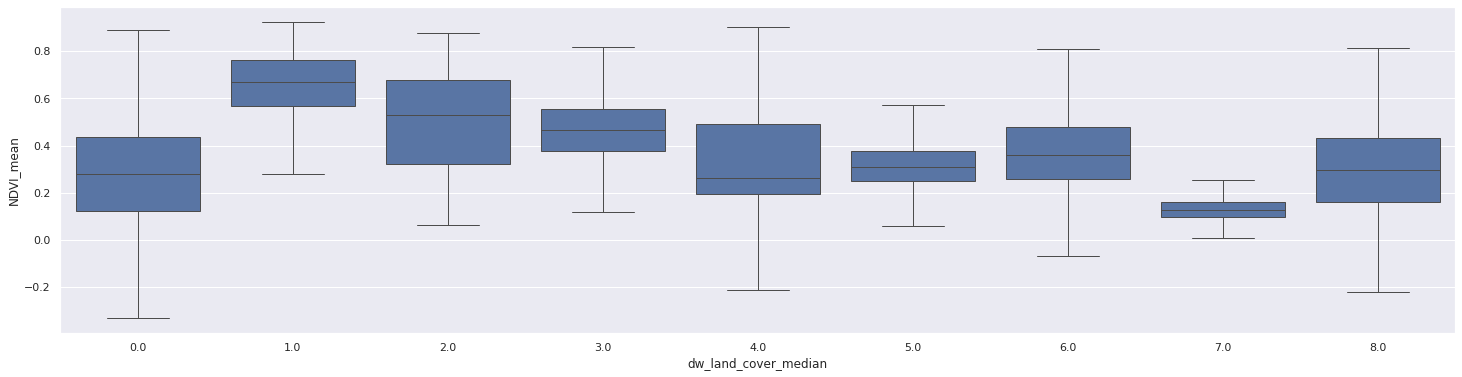

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.boxplot(gedi_unburned_p, y="NDVI_mean", showfliers=False, x="dw_land_cover_median")

In [12]:
# We want to keep only forests, so we keep land_cover == 1
gedi_unburned_p = gedi_unburned_p[gedi_unburned_p.dw_land_cover_median == 1]
gedi_unburned_p.drop(columns=["dw_land_cover_median", "dw_land_cover_mean", "dw_land_cover_3x3", "dw_land_cover_std"], inplace=True)

In [13]:
len(gedi_unburned_p), len(gedi_unburned)

(3137280, 8024068)

<AxesSubplot: xlabel='gridded_pft_class', ylabel='agbd'>

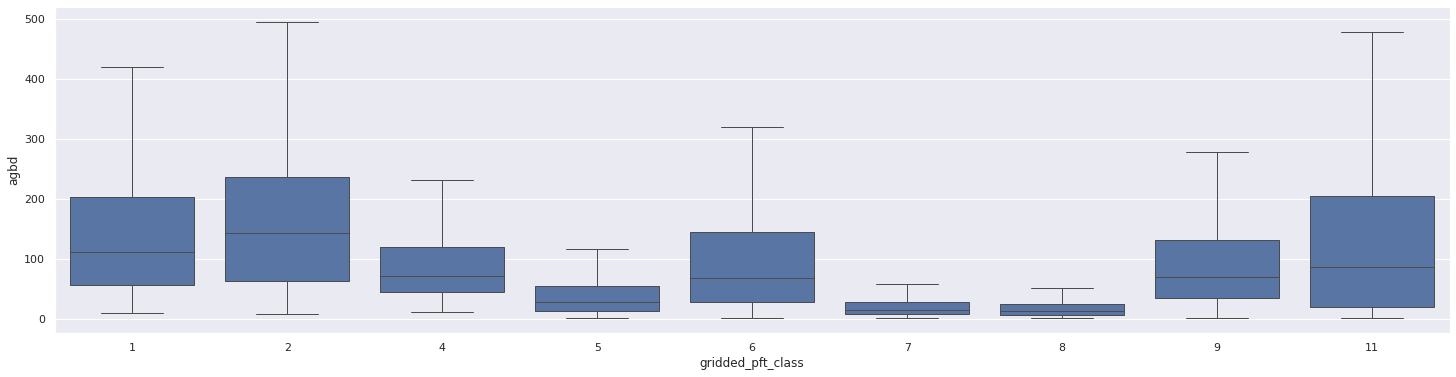

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.boxplot(gedi_unburned_p, y="agbd", x="gridded_pft_class", showfliers=False)

<AxesSubplot: xlabel='gridded_pft_class', ylabel='NDVI_mean'>

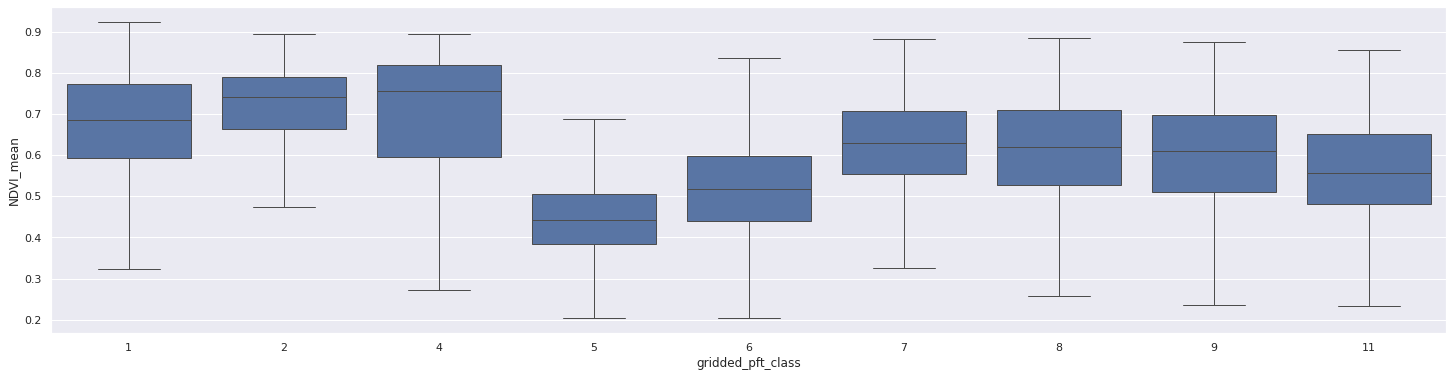

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.boxplot(gedi_unburned_p, y="NDVI_mean", x="gridded_pft_class", showfliers=False)

3137280
Share of samples with non-trees pft class: 0.11986689106487149


<AxesSubplot: xlabel='gridded_pft_class', ylabel='Count'>

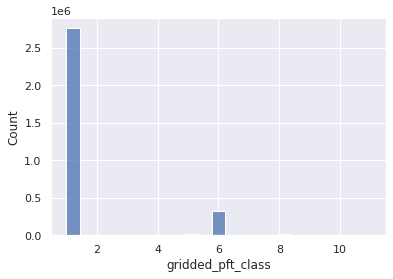

In [18]:
print(len(gedi_unburned_p))
print(f"Share of samples with non-trees pft class: {len(gedi_unburned_p[gedi_unburned_p.gridded_pft_class != 1])/len(gedi_unburned_p)}")
sns.histplot(gedi_unburned_p, x="gridded_pft_class")

I'm definitely not sure if I should include PFTs other than Evergeen Needleleaf Forest - if I should include the ones declares as grass by modis? Their agbd actually seems just a bit smaller than ENF, but their NDVI is quite a bit smaller. 

For now, excluding them from the unburned shots.

In [19]:
gedi_unburned_p = gedi_unburned_p[gedi_unburned_p.gridded_pft_class == 1]

In [22]:
from src.constants import DATA_PATH, USER_PATH
save_pickle(f"{DATA_PATH}/gedi_intermediate/filtered_unburned_shots.pkl", gedi_unburned_p)

### Unburned shots - correlation study

In [23]:
gedi_unburned_p.columns

Index(['shot_number', 'beam_type', 'absolute_time', 'longitude', 'latitude',
       'elevation_difference_tdx', 'agbd', 'agbd_se', 'fhd_normal', 'pai',
       'pai_z', 'pavd_z', 'rh_98', 'rh_70', 'rh_50', 'rh_25', 'cover',
       'cover_z', 'sensitivity_a0', 'solar_elevation', 'gridded_pft_class',
       'geometry', 'gedi_year', 'gedi_month', 'severity', 'burn_year',
       'burn_count', 'time_since_burn', 'aspect_2x2', 'aspect_mean',
       'aspect_std', 'aspect_median', 'elevation_2x2', 'elevation_mean',
       'elevation_std', 'elevation_median', 'slope_2x2', 'slope_mean',
       'slope_std', 'slope_median', 'soil_2x2', 'soil_mean', 'soil_std',
       'soil_median', 'SR_B1_2x2', 'SR_B1_mean', 'SR_B1_std', 'SR_B1_median',
       'SR_B2_2x2', 'SR_B2_mean', 'SR_B2_std', 'SR_B2_median', 'SR_B3_2x2',
       'SR_B3_mean', 'SR_B3_std', 'SR_B3_median', 'SR_B4_2x2', 'SR_B4_mean',
       'SR_B4_std', 'SR_B4_median', 'SR_B5_2x2', 'SR_B5_mean', 'SR_B5_std',
       'SR_B5_median', 'SR_B6_2x2', '

In [ ]:
gedi_unburned_p.plot(x="agbd", figsize=(15, 10))

### Relationship with elevation_difference_tdx

When elevation_difference_tdx is negative, it means that GEDI's estimated elevation is higher than the one estimated by tandem x. So somehow higher elevation by GEDI -> larger AGBD value.

In [40]:
gedi_unburned_subset = gedi_unburned_p[["elevation_difference_tdx", "agbd", "pai", "rh_98", "rh_70", "rh_50", "rh_25", "slope_median", "elevation_median", "NDVI_mean"]]

In [29]:
gedi_unburned_subset.corr()

,elevation_difference_tdx,agbd,pai,rh_98,rh_70,rh_50,rh_25,slope_median,elevation_median
elevation_difference_tdx,1.000000,-0.520646,-0.384572,-0.520823,-0.504391,-0.463735,-0.402970,-0.186896,0.016229
agbd,-0.520646,1.000000,0.623708,0.883664,0.967864,0.879001,0.710160,0.241170,-0.071736
pai,-0.384572,0.623708,1.000000,0.527323,0.703786,0.794334,0.888148,0.393131,-0.169884
rh_98,-0.520823,0.883664,0.527323,1.000000,0.832767,0.693897,0.562609,0.193752,0.040547
rh_70,-0.504391,0.967864,0.703786,0.832767,1.000000,0.912373,0.747652,0.271452,-0.109116
rh_50,-0.463735,0.879001,0.794334,0.693897,0.912373,1.000000,0.876985,0.332607,-0.182252
rh_25,-0.402970,0.710160,0.888148,0.562609,0.747652,0.876985,1.000000,0.362385,-0.194117
slope_median,-0.186896,0.241170,0.393131,0.193752,0.271452,0.332607,0.362385,1.000000,0.009706
elevation_median,0.016229,-0.071736,-0.169884,0.040547,-0.109116,-0.182252,-0.194117,0.009706,1.000000


<AxesSubplot: xlabel='agbd', ylabel='elevation_difference_tdx'>

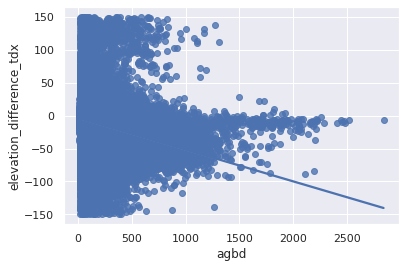

In [33]:
sns.regplot(gedi_unburned_subset, x="agbd", y="elevation_difference_tdx")

In [34]:
def filter_elevation_diff(df, threshold):
    return df[(df.elevation_difference_tdx > -threshold) & (df.elevation_difference_tdx < threshold)]

In [37]:
print(len(gedi_unburned_p))
print(f"10m error for elevation difference: {len(filter_elevation_diff(gedi_unburned_p, 10))/len(gedi_unburned_p)}")
print(f"20m error for elevation difference: {len(filter_elevation_diff(gedi_unburned_p, 20))/len(gedi_unburned_p)}")
print(f"30m error for elevation difference: {len(filter_elevation_diff(gedi_unburned_p, 30))/len(gedi_unburned_p)}")
print(f"40m error for elevation difference: {len(filter_elevation_diff(gedi_unburned_p, 40))/len(gedi_unburned_p)}")
print(f"50m error for elevation difference: {len(filter_elevation_diff(gedi_unburned_p, 50))/len(gedi_unburned_p)}")

2761224
10m error for elevation difference: 0.5058937630558042
20m error for elevation difference: 0.8148107505946638
30m error for elevation difference: 0.937614260921968
40m error for elevation difference: 0.9801276535333606
50m error for elevation difference: 0.993464854716604


In [41]:
gedi_unburned_subset = filter_elevation_diff(gedi_unburned_subset, 20)

In [42]:
gedi_unburned_subset.corr()

,elevation_difference_tdx,agbd,pai,rh_98,rh_70,rh_50,rh_25,slope_median,elevation_median,NDVI_mean
elevation_difference_tdx,1.000000,-0.365232,-0.239715,-0.401044,-0.360734,-0.293665,-0.233834,0.079265,-0.025697,-0.212507
agbd,-0.365232,1.000000,0.618763,0.858916,0.964339,0.850003,0.679061,0.208097,-0.036822,0.433189
pai,-0.239715,0.618763,1.000000,0.474620,0.698771,0.811689,0.911680,0.356664,-0.151898,0.340221
rh_98,-0.401044,0.858916,0.474620,1.000000,0.783154,0.618580,0.495551,0.134520,0.089086,0.375963
rh_70,-0.360734,0.964339,0.698771,0.783154,1.000000,0.892237,0.723585,0.237533,-0.084663,0.464865
rh_50,-0.293665,0.850003,0.811689,0.618580,0.892237,1.000000,0.874958,0.317446,-0.165358,0.459629
rh_25,-0.233834,0.679061,0.911680,0.495551,0.723585,0.874958,1.000000,0.338244,-0.171491,0.367878
slope_median,0.079265,0.208097,0.356664,0.134520,0.237533,0.317446,0.338244,1.000000,0.038605,0.181418
elevation_median,-0.025697,-0.036822,-0.151898,0.089086,-0.084663,-0.165358,-0.171491,0.038605,1.000000,-0.169421
NDVI_mean,-0.212507,0.433189,0.340221,0.375963,0.464865,0.459629,0.367878,0.181418,-0.169421,1.000000


<AxesSubplot: xlabel='agbd', ylabel='Density'>

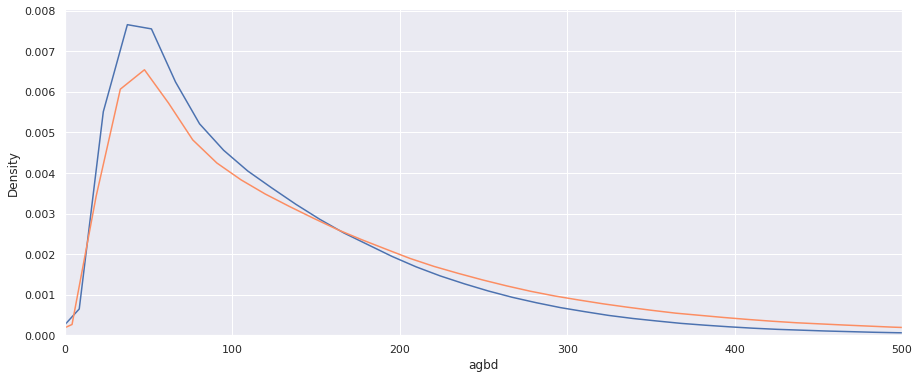

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(gedi_unburned_subset, x="agbd")
ax.set_xlim((0, 500))
sns.kdeplot(gedi_unburned_p, x="agbd", color=palette[1])

<AxesSubplot: xlabel='NDVI_mean', ylabel='Density'>

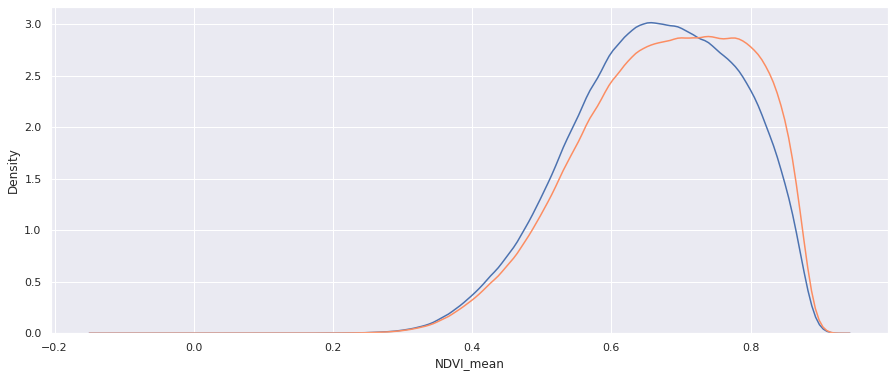

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(gedi_unburned_subset, x="NDVI_mean")
sns.kdeplot(gedi_unburned_p, x="NDVI_mean", color=palette[1])

### Look at burned shots

492582
Share of samples with heterogenous land cover: 0.10307319390477118


<AxesSubplot: xlabel='dw_land_cover_std', ylabel='Count'>

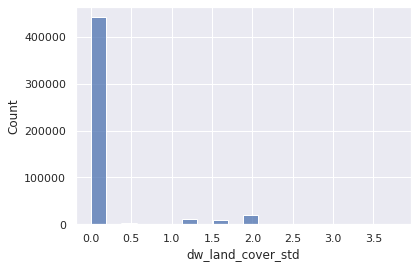

In [47]:
print(len(gedi_burned))
print(f"Share of samples with heterogenous land cover: {len(gedi_burned[gedi_burned.dw_land_cover_std != 0])/len(gedi_burned)}")
sns.histplot(gedi_burned, x="dw_land_cover_std")

In [78]:
print(len(gedi_burned))
print(f"Share of samples with tree cover 1 and pft class 1: {len(gedi_burned[(gedi_burned.dw_land_cover_median == 1) & (gedi_burned.gridded_pft_class == 1)])/len(gedi_burned)}")
print(f"Share of samples with pft class 1: {len(gedi_burned[(gedi_burned.gridded_pft_class == 1)])/len(gedi_burned)}")

492582
Share of samples with tree cover 1 and pft class 1: 0.5240102155580187
Share of samples with pft class 1: 0.8190494171528802


<AxesSubplot: xlabel='dw_land_cover_median', ylabel='Count'>

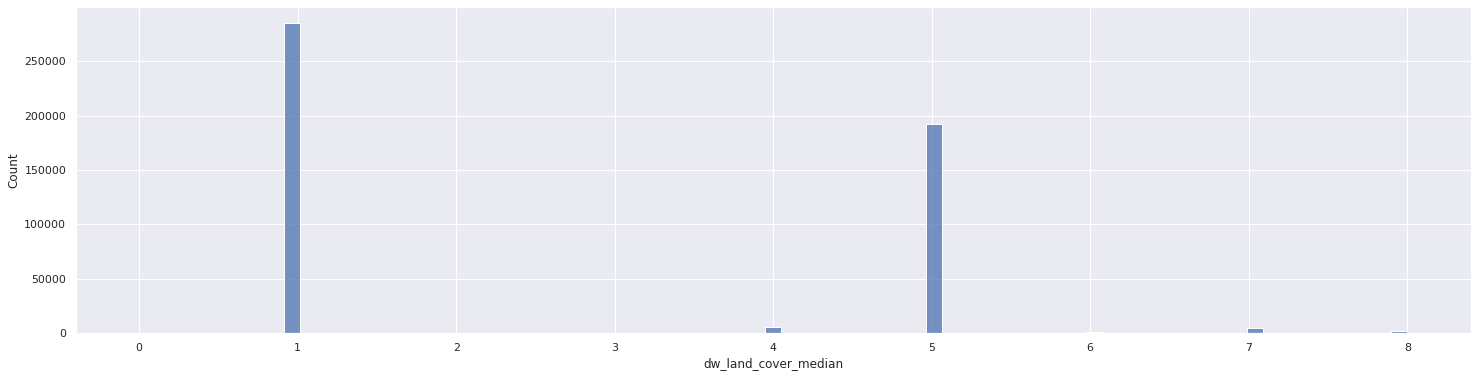

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.histplot(gedi_burned, x="dw_land_cover_median")
# 1 = trees
# 2 = grass
# 4 = crops
# 5 = shrub_and_scrub
# 6 = built
# 7 = bare
# 8 = snow_and_ice

<AxesSubplot: xlabel='time_since_burn', ylabel='Count'>

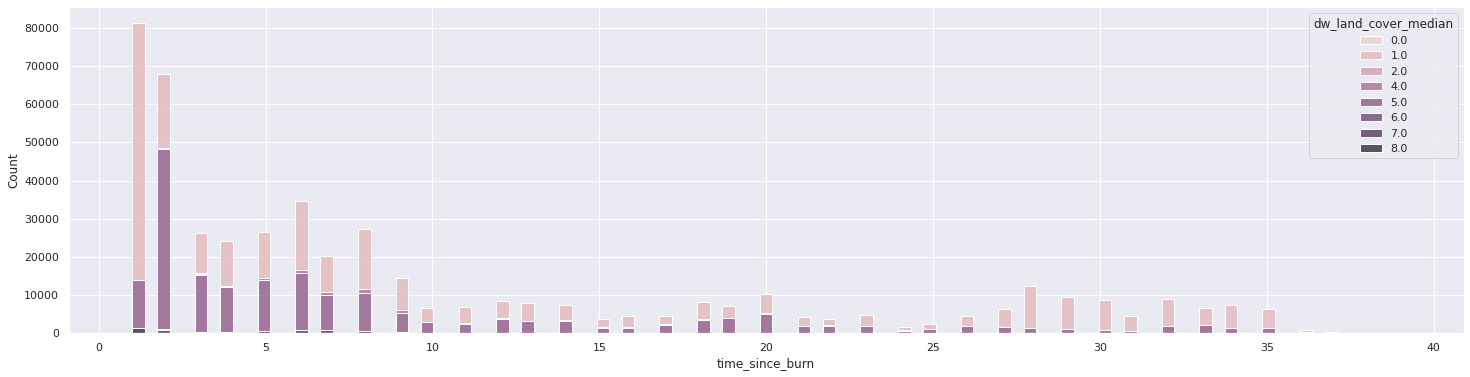

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.histplot(gedi_burned, x="time_since_burn", hue="dw_land_cover_median", multiple="stack")

<AxesSubplot: xlabel='time_since_burn', ylabel='Count'>

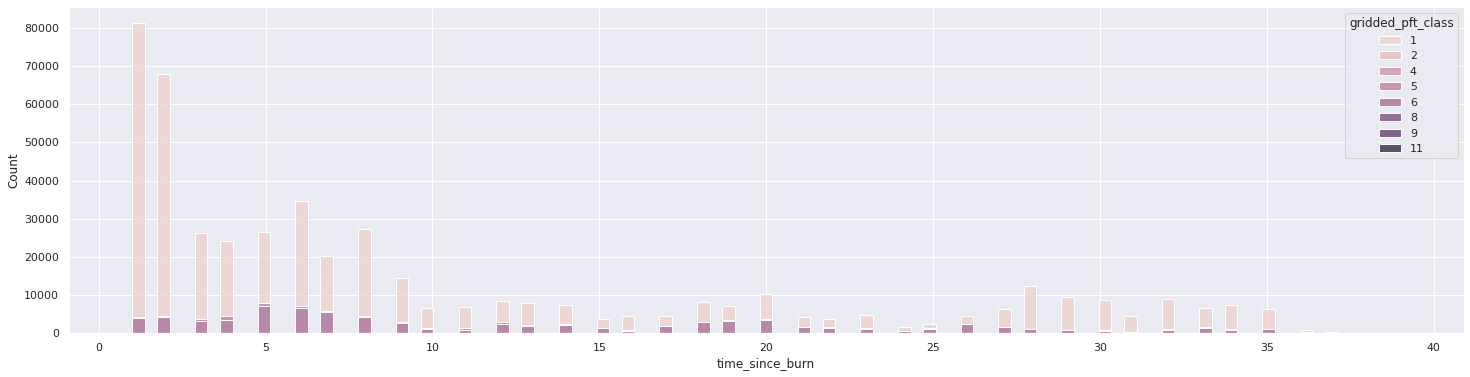

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.histplot(gedi_burned, x="time_since_burn", hue="gridded_pft_class", multiple="stack")

In [60]:
trees_per_time = gedi_burned[gedi_burned.dw_land_cover_median == 1].groupby("time_since_burn").count().dw_land_cover_median.to_numpy()
shrubs_per_time = gedi_burned[gedi_burned.dw_land_cover_median == 5].groupby("time_since_burn").count().dw_land_cover_median.to_numpy()

<AxesSubplot: >

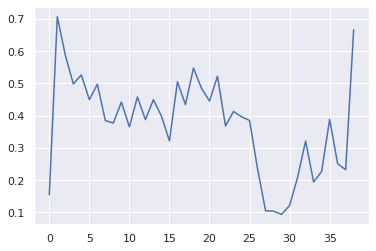

In [69]:
import numpy as np
df = gedi_burned
trees_per_time = df[df.dw_land_cover_median == 1].groupby("time_since_burn").count().dw_land_cover_median.to_numpy()
shrubs_per_time = df[df.dw_land_cover_median == 5].groupby("time_since_burn").count().dw_land_cover_median.to_numpy()
sns.lineplot(np.divide(shrubs_per_time, np.add(trees_per_time, shrubs_per_time)))

<AxesSubplot: >

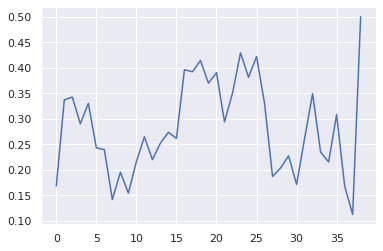

In [70]:
import numpy as np
df = gedi_burned[gedi_burned.severity == 2]
trees_per_time = df[df.dw_land_cover_median == 1].groupby("time_since_burn").count().dw_land_cover_median.to_numpy()
shrubs_per_time = df[df.dw_land_cover_median == 5].groupby("time_since_burn").count().dw_land_cover_median.to_numpy()
sns.lineplot(np.divide(shrubs_per_time, np.add(trees_per_time, shrubs_per_time)))

<AxesSubplot: >

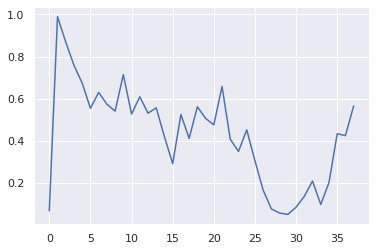

In [74]:
import numpy as np
df = gedi_burned[gedi_burned.severity == 4]
trees_per_time = df[df.dw_land_cover_median == 1].groupby("time_since_burn").count().dw_land_cover_median.to_numpy()
shrubs_per_time = df[df.dw_land_cover_median == 5].groupby("time_since_burn").count().dw_land_cover_median.to_numpy()
sns.lineplot(np.divide(shrubs_per_time, np.add(trees_per_time, shrubs_per_time)))

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

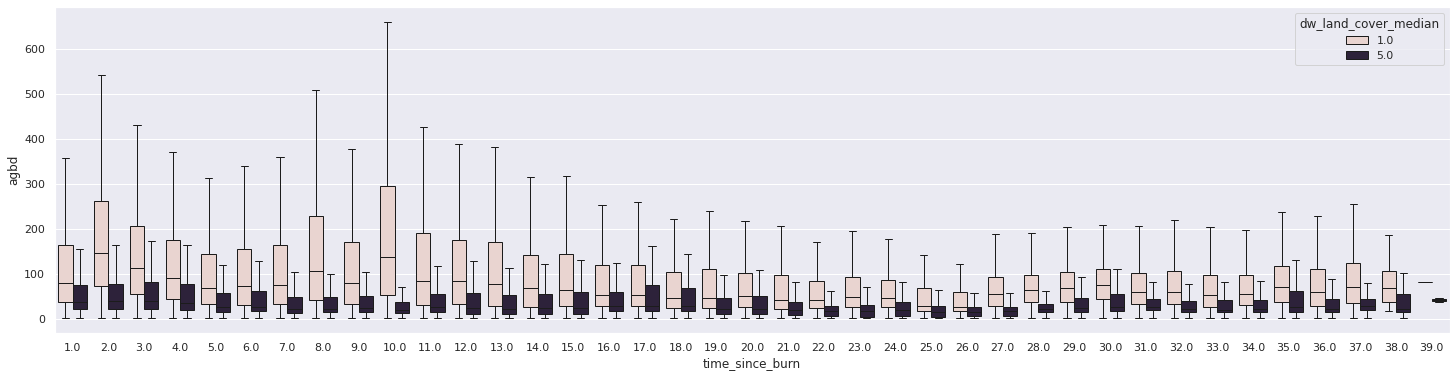

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.boxplot(gedi_burned[gedi_burned.dw_land_cover_median.isin([1, 5])], x="time_since_burn", y="agbd", hue="dw_land_cover_median", showfliers=False)

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

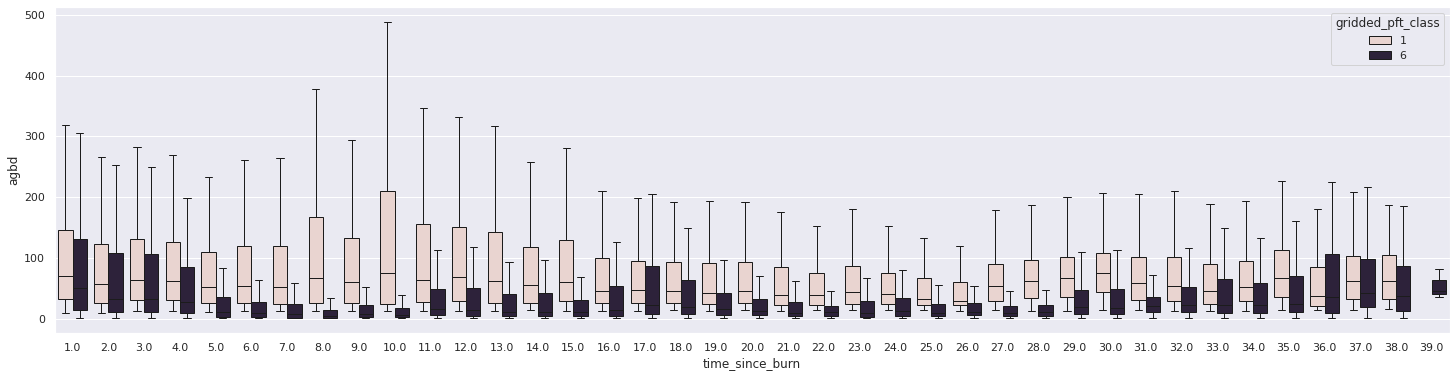

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.boxplot(gedi_burned[gedi_burned.gridded_pft_class.isin([1, 6])], x="time_since_burn", y="agbd", hue="gridded_pft_class", showfliers=False)

It seems that for the gridded_pft_class = grass, NDVI is lower overall anyways, so agbd predictions might simply be stemming from a different vegetation, not from a model that was callibrated differently. I don't think I should filter shrubs and grass from burned areas - they are an indication of lack of forest recovery, so we do want to have them here.

<AxesSubplot: xlabel='time_since_burn', ylabel='NDVI_mean'>

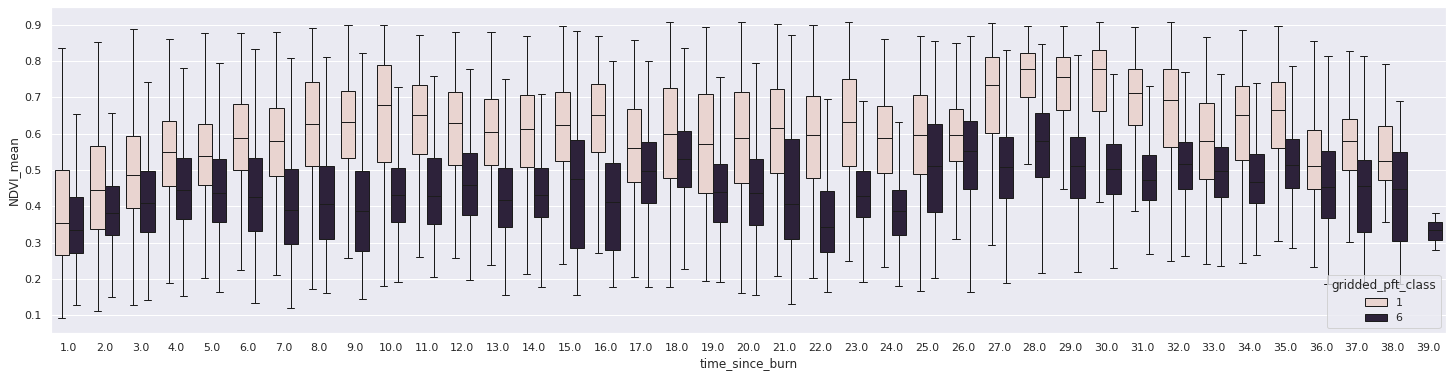

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.boxplot(gedi_burned[gedi_burned.gridded_pft_class.isin([1, 6])], x="time_since_burn", y="NDVI_mean", hue="gridded_pft_class", showfliers=False)

### time series of gedi burned

In [108]:
gedi_burned = gedi_burned[gedi_burned.time_since_burn < 36]

In [111]:
gedi_burned = gedi_pipeline.add_time_since_burn_categories_3(gedi_burned)
gedi_burned = gedi_pipeline.add_time_since_burn_categories_5(gedi_burned)
gedi_burned = gedi_pipeline.add_time_since_burn_categories_7(gedi_burned)
gedi_burned = gedi_pipeline.add_time_since_burn_categories_10(gedi_burned)

<AxesSubplot: xlabel='time_since_burn', ylabel='Count'>

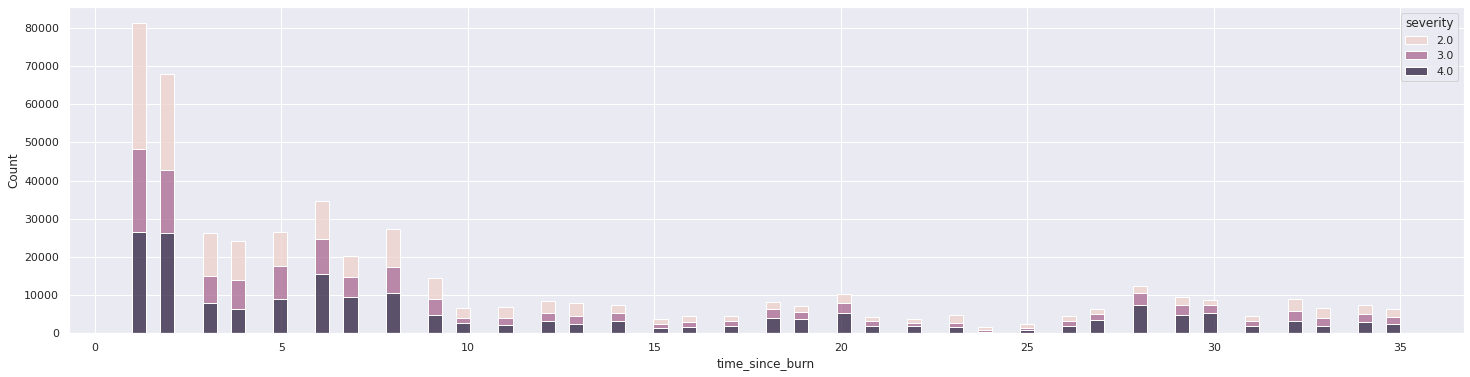

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.histplot(gedi_burned, x="time_since_burn", hue="severity", ax=ax, multiple="stack")

<AxesSubplot: xlabel='time_since_burn_cat_3', ylabel='Count'>

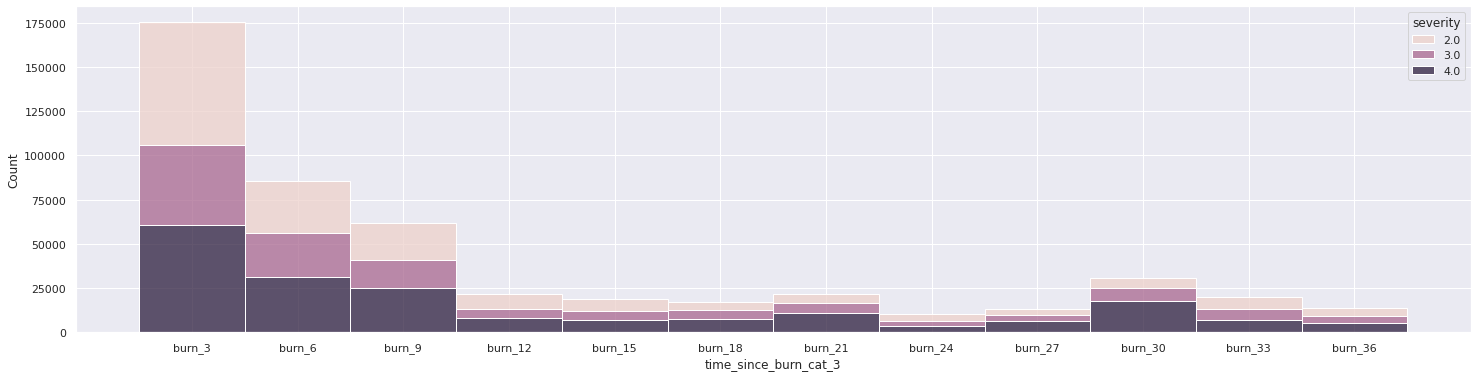

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.histplot(gedi_burned, x="time_since_burn_cat_3", hue="severity", ax=ax, multiple="stack")

<AxesSubplot: xlabel='pai', ylabel='Density'>

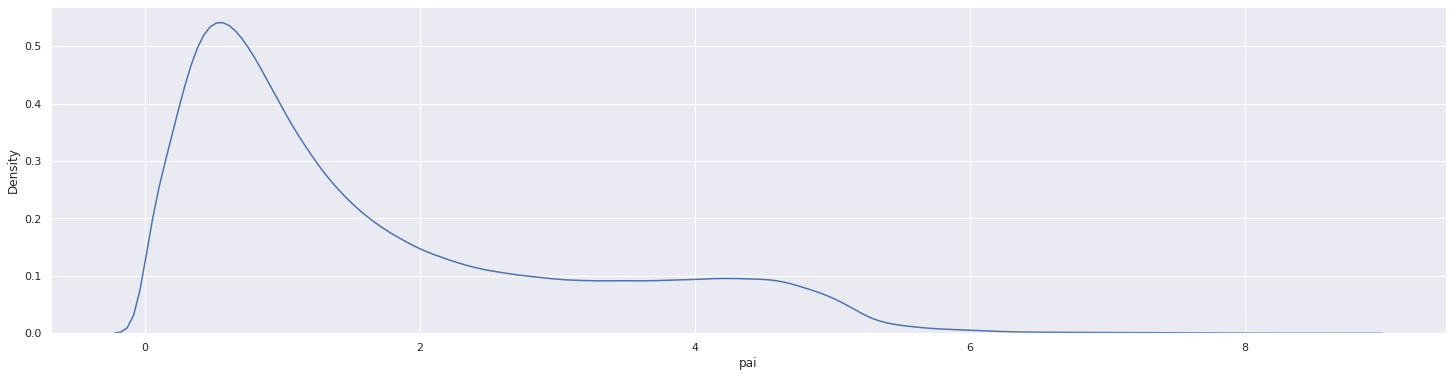

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.kdeplot(gedi_unburned_p, x="pai")

In [136]:
gedi_unburned_p.pai.mean()

1.1642419695854187

In [138]:
gedi_unburned_p.agbd.mean()

150.06454508150307

(0.0, 600.0)

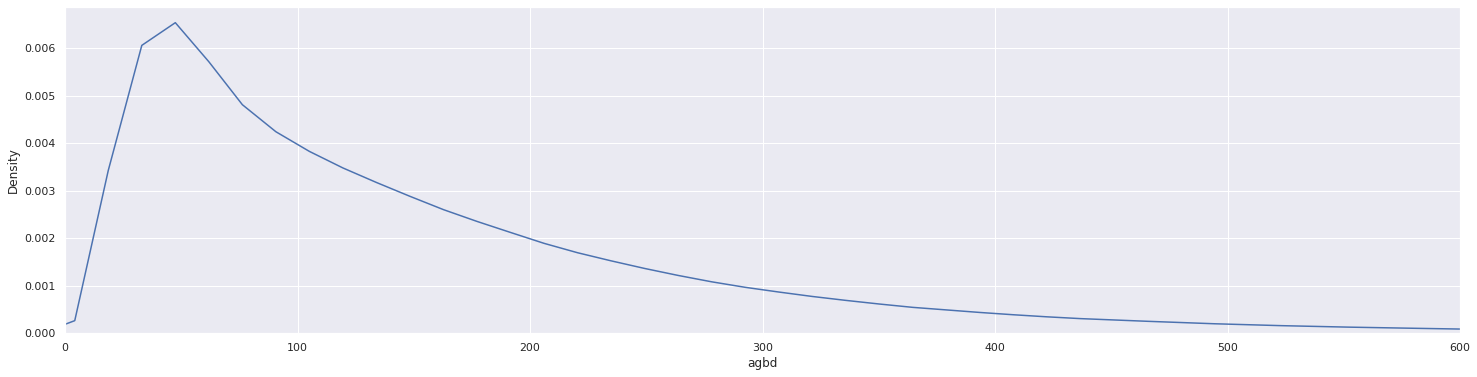

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.kdeplot(gedi_unburned_p, x="agbd")
ax.set_xlim((0, 600))

<AxesSubplot: xlabel='time_since_burn_cat_3', ylabel='NDVI_mean'>

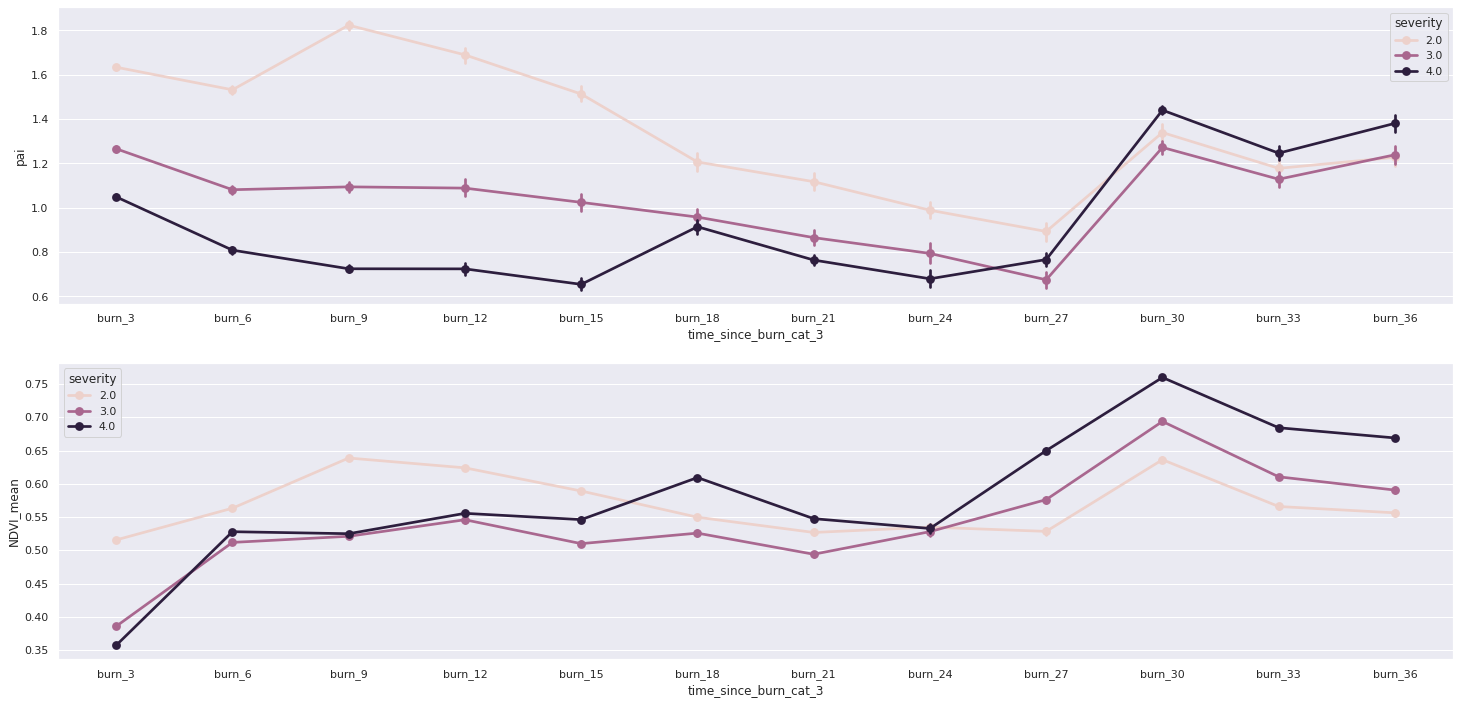

In [116]:
fig, ax = plt.subplots(2, 1, figsize=(25, 12))
sns.pointplot(gedi_burned, x="time_since_burn_cat_3", y="pai", hue="severity", ax=ax[0])
sns.pointplot(gedi_burned, x="time_since_burn_cat_3", y="NDVI_mean", hue="severity", ax=ax[1])

<AxesSubplot: xlabel='time_since_burn_cat_3', ylabel='NDVI_mean'>

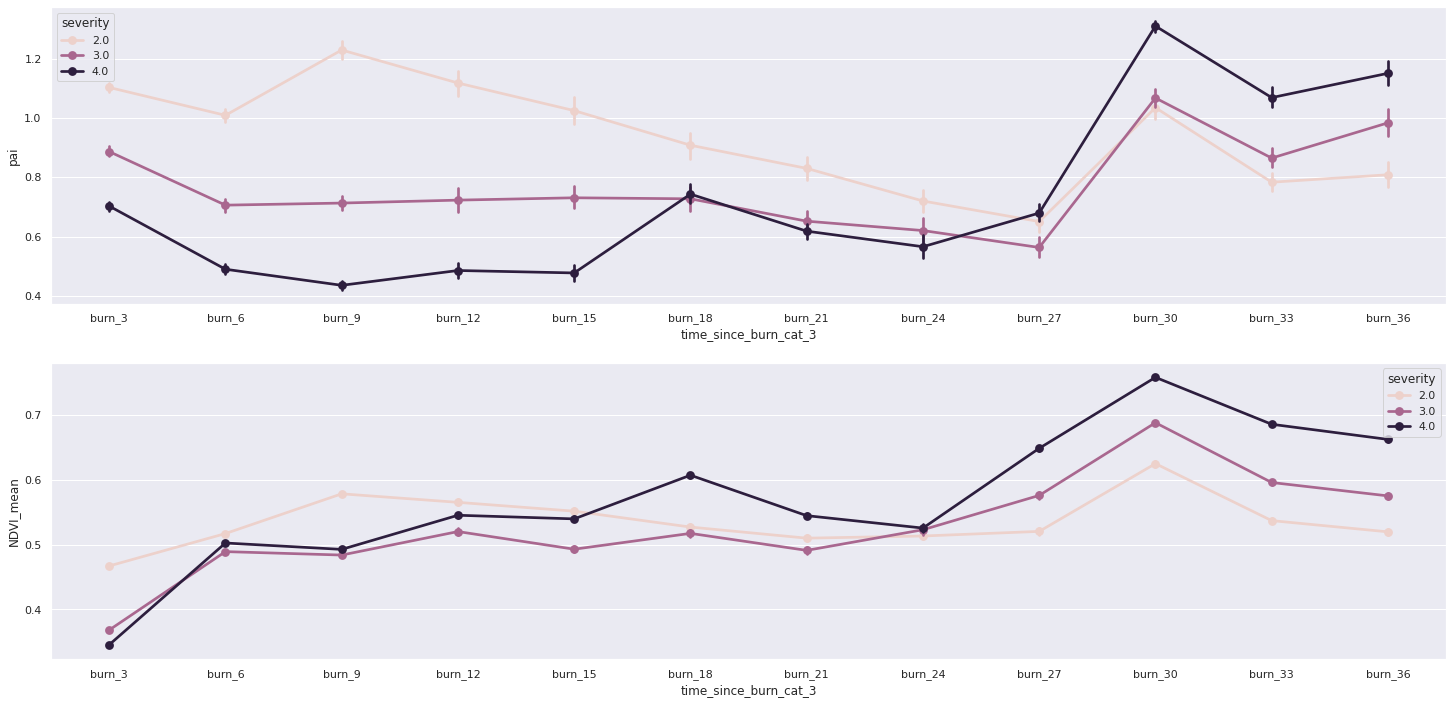

In [119]:
fig, ax = plt.subplots(2, 1, figsize=(25, 12))
sns.pointplot(filter_elevation_diff(gedi_burned, 10), x="time_since_burn_cat_3", y="pai", hue="severity", ax=ax[0])
sns.pointplot(filter_elevation_diff(gedi_burned, 10), x="time_since_burn_cat_3", y="NDVI_mean", hue="severity", ax=ax[1])

<AxesSubplot: xlabel='time_since_burn', ylabel='NDVI_mean'>

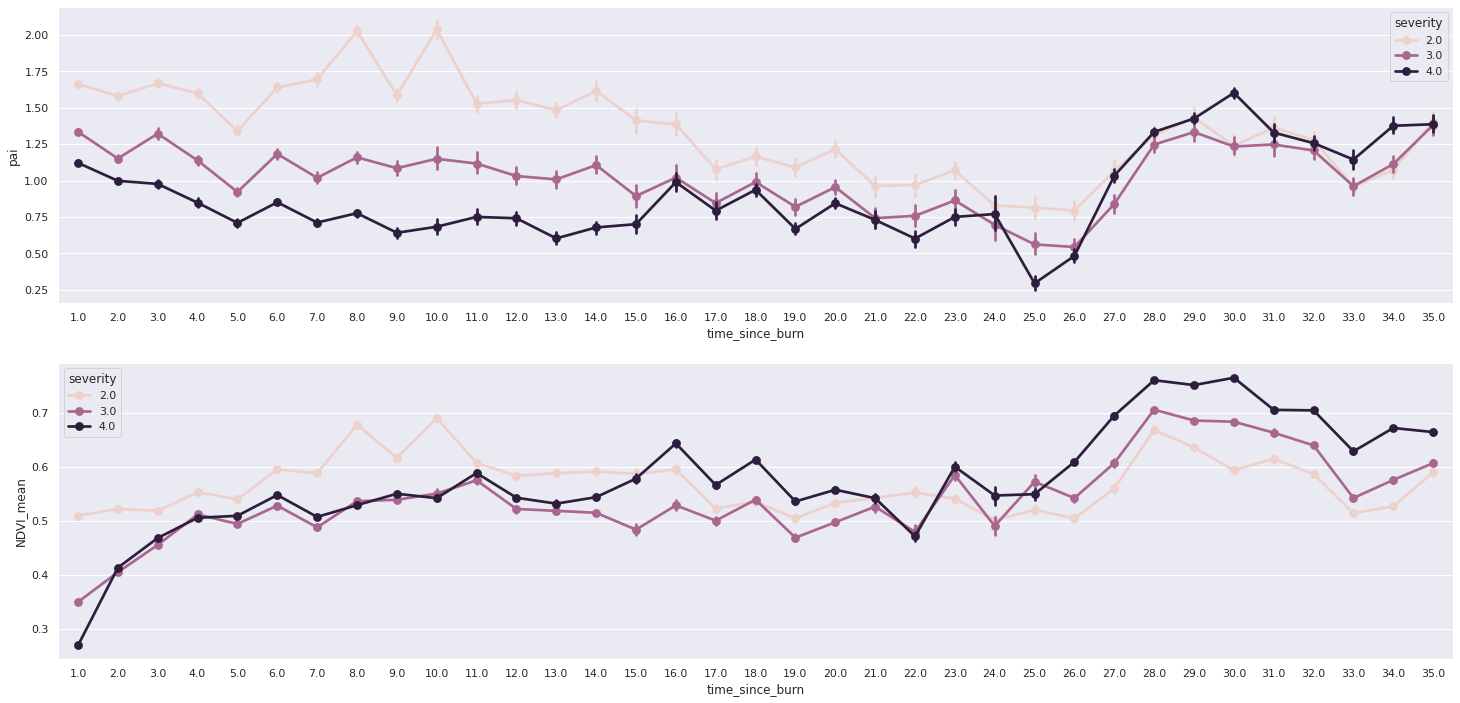

In [110]:
fig, ax = plt.subplots(2, 1, figsize=(25, 12))
sns.pointplot(gedi_burned, x="time_since_burn", y="pai", hue="severity", ax=ax[0])
sns.pointplot(gedi_burned, x="time_since_burn", y="NDVI_mean", hue="severity", ax=ax[1])

<AxesSubplot: xlabel='time_since_burn', ylabel='rh_98'>

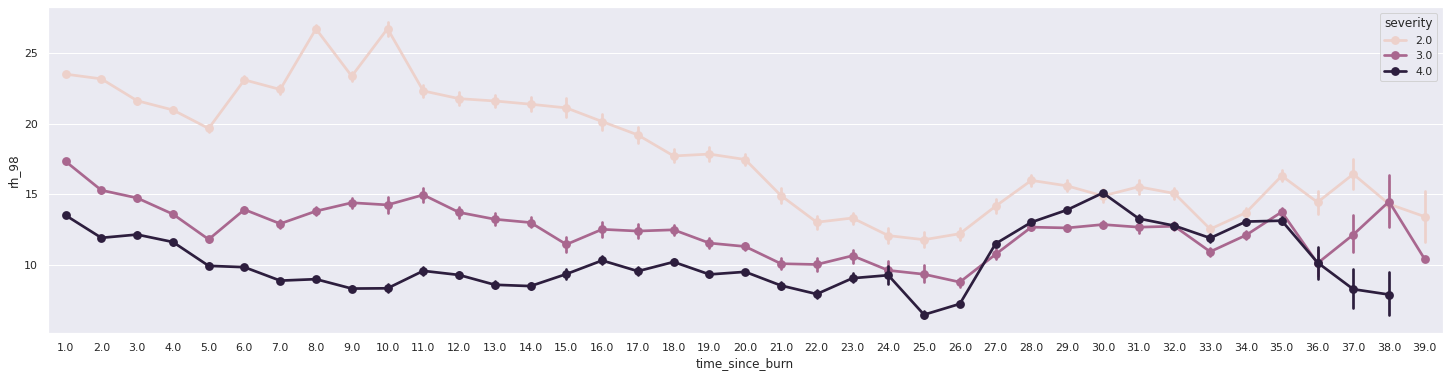

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.pointplot(gedi_burned, x="time_since_burn", y="rh_98", hue="severity")

<AxesSubplot: xlabel='time_since_burn', ylabel='rh_25'>

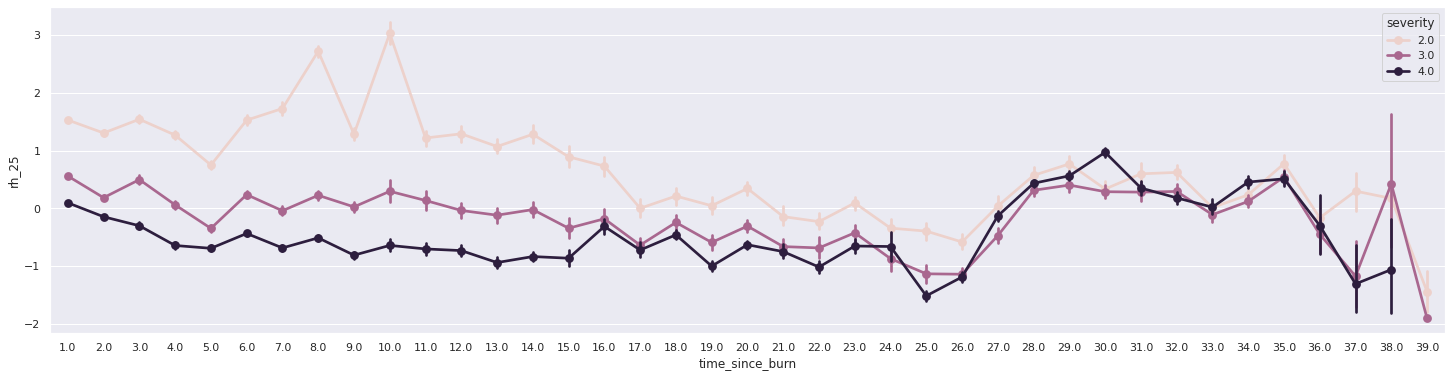

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.pointplot(gedi_burned, x="time_since_burn", y="rh_25", hue="severity")

<AxesSubplot: xlabel='time_since_burn', ylabel='NDVI_mean'>

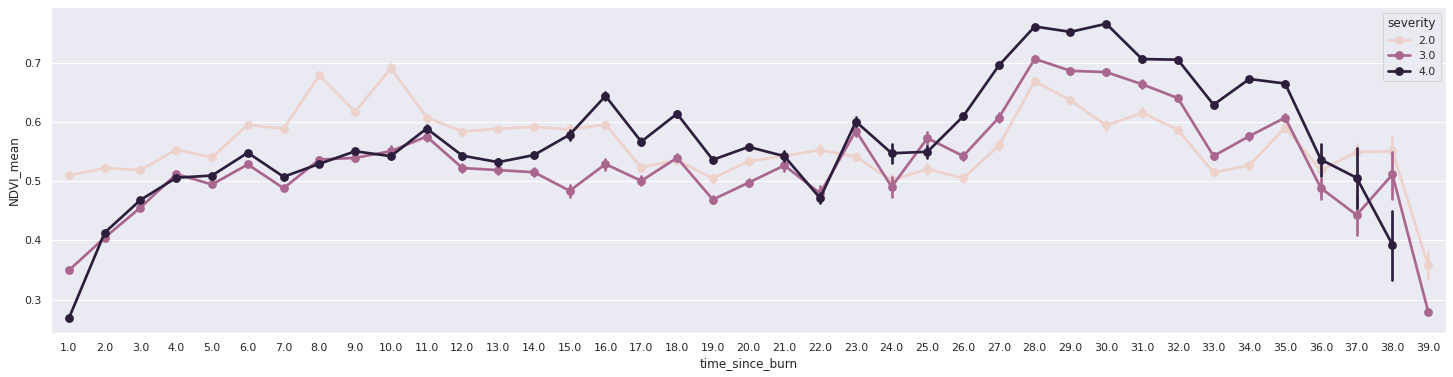

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.pointplot(gedi_burned, x="time_since_burn", y="NDVI_mean", hue="severity")

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

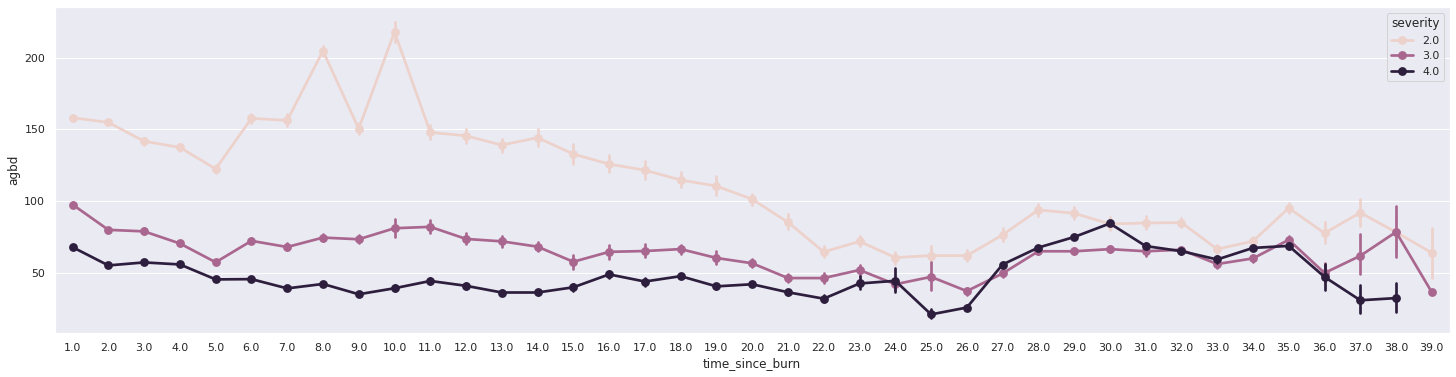

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.pointplot(gedi_burned, x="time_since_burn", y="agbd", hue="severity")

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

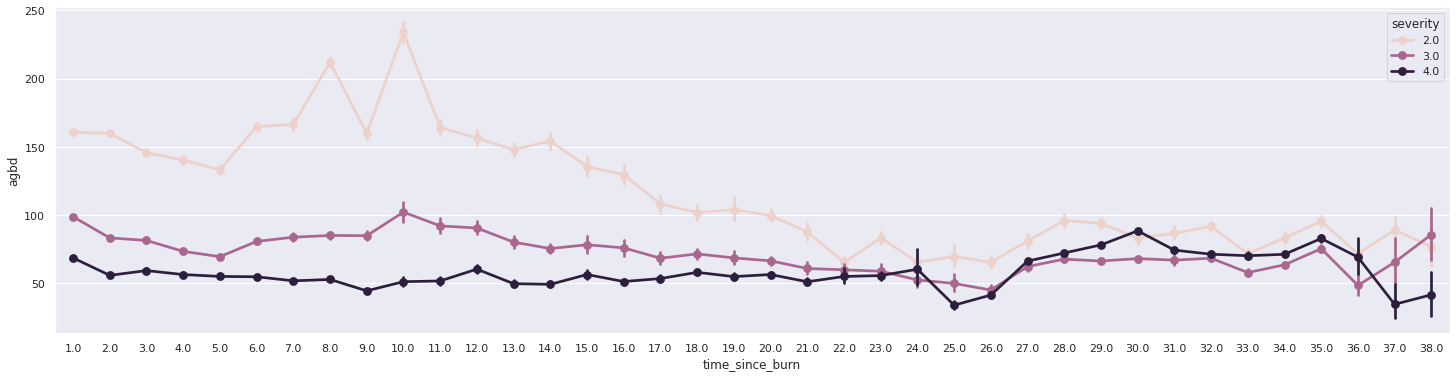

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.pointplot(gedi_burned[(gedi_burned.gridded_pft_class == 1) & gedi_burned.dw_land_cover_median == 1], x="time_since_burn", y="agbd", hue="severity")

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

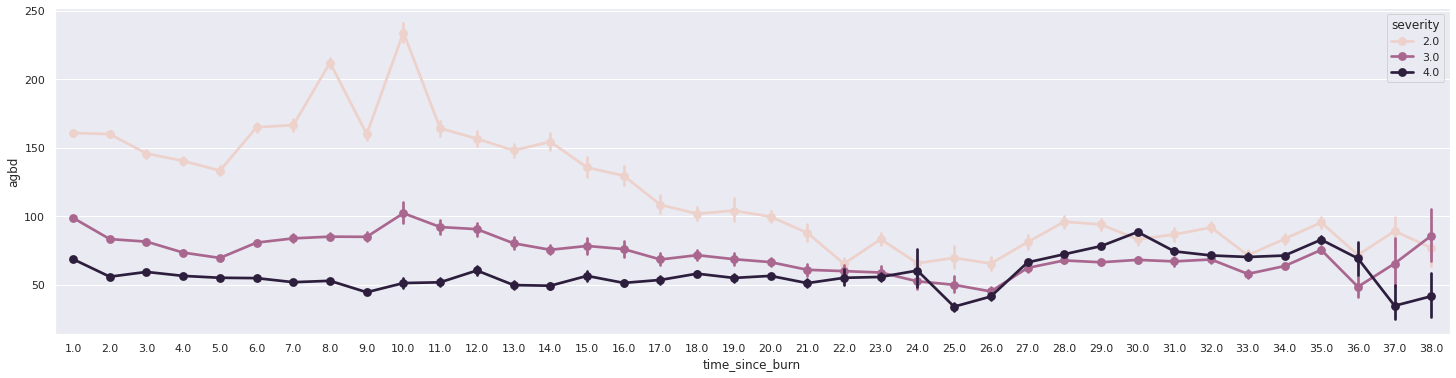

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.pointplot(gedi_burned[gedi_burned.gridded_pft_class == 1], x="time_since_burn", y="agbd", hue="severity")

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

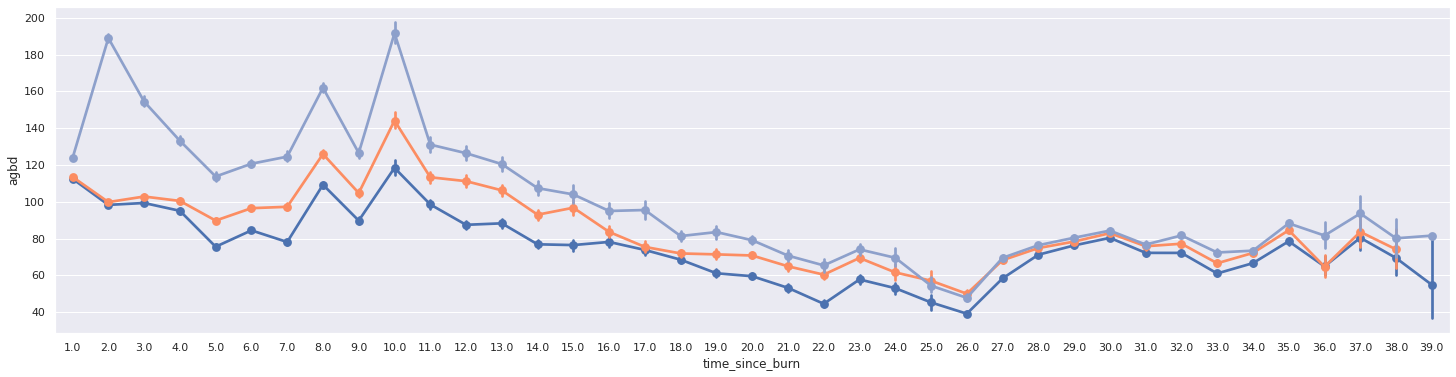

In [91]:
fig, ax = plt.subplots(2, 1, figsize=(25, 6))
sns.pointplot(gedi_burned, x="time_since_burn", y="agbd")
sns.pointplot(gedi_burned[gedi_burned.gridded_pft_class == 1], x="time_since_burn", y="agbd", color=palette[1])
sns.pointplot(gedi_burned[gedi_burned.dw_land_cover_median == 1], x="time_since_burn", y="agbd", color=palette[2])

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

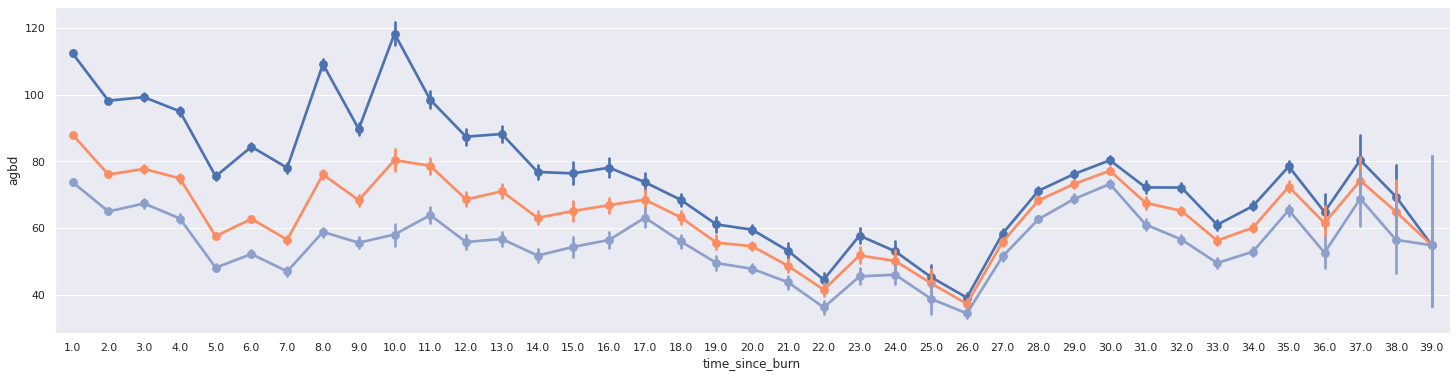

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.pointplot(gedi_burned, x="time_since_burn", y="agbd")
sns.pointplot(filter_elevation_diff(gedi_burned, 20), x="time_since_burn", y="agbd", color=palette[1])
sns.pointplot(filter_elevation_diff(gedi_burned, 10), x="time_since_burn", y="agbd", color=palette[2])

<AxesSubplot: xlabel='time_since_burn', ylabel='pai'>

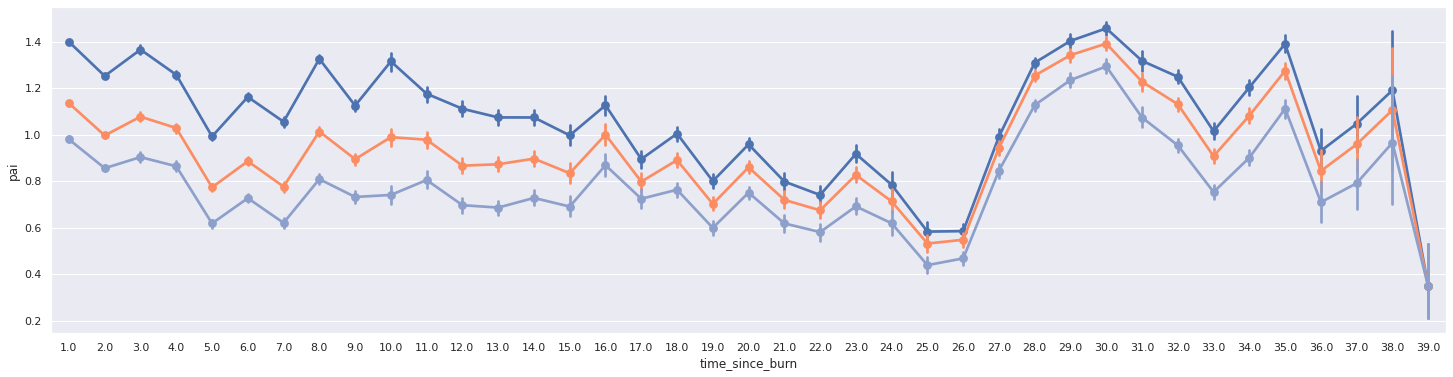

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.pointplot(gedi_burned, x="time_since_burn", y="pai")
sns.pointplot(filter_elevation_diff(gedi_burned, 20), x="time_since_burn", y="pai", color=palette[1])
sns.pointplot(filter_elevation_diff(gedi_burned, 10), x="time_since_burn", y="pai", color=palette[2])

In [92]:
gedi_burned_subset = gedi_burned[["elevation_difference_tdx", "agbd", "pai", "rh_98", "rh_70", "rh_50", "rh_25", "slope_median", "elevation_median", "NDVI_mean"]]

In [93]:
gedi_burned_subset.corr()

,elevation_difference_tdx,agbd,pai,rh_98,rh_70,rh_50,rh_25,slope_median,elevation_median,NDVI_mean
elevation_difference_tdx,1.000000,-0.351831,-0.298782,-0.373664,-0.357409,-0.335139,-0.311181,-0.137617,0.016545,-0.060381
agbd,-0.351831,1.000000,0.591070,0.879368,0.932280,0.824738,0.657756,0.229971,-0.037101,0.286297
pai,-0.298782,0.591070,1.000000,0.572510,0.741399,0.836205,0.934735,0.373838,-0.163334,0.242458
rh_98,-0.373664,0.879368,0.572510,1.000000,0.831329,0.707595,0.591531,0.245031,-0.005110,0.295694
rh_70,-0.357409,0.932280,0.741399,0.831329,1.000000,0.920030,0.779454,0.312034,-0.105697,0.334941
rh_50,-0.335139,0.824738,0.836205,0.707595,0.920030,1.000000,0.898157,0.352182,-0.154331,0.313101
rh_25,-0.311181,0.657756,0.934735,0.591531,0.779454,0.898157,1.000000,0.322817,-0.164541,0.244097
slope_median,-0.137617,0.229971,0.373838,0.245031,0.312034,0.352182,0.322817,1.000000,-0.063916,0.066424
elevation_median,0.016545,-0.037101,-0.163334,-0.005110,-0.105697,-0.154331,-0.164541,-0.063916,1.000000,-0.281264
NDVI_mean,-0.060381,0.286297,0.242458,0.295694,0.334941,0.313101,0.244097,0.066424,-0.281264,1.000000


<AxesSubplot: xlabel='time_since_burn', ylabel='pai'>

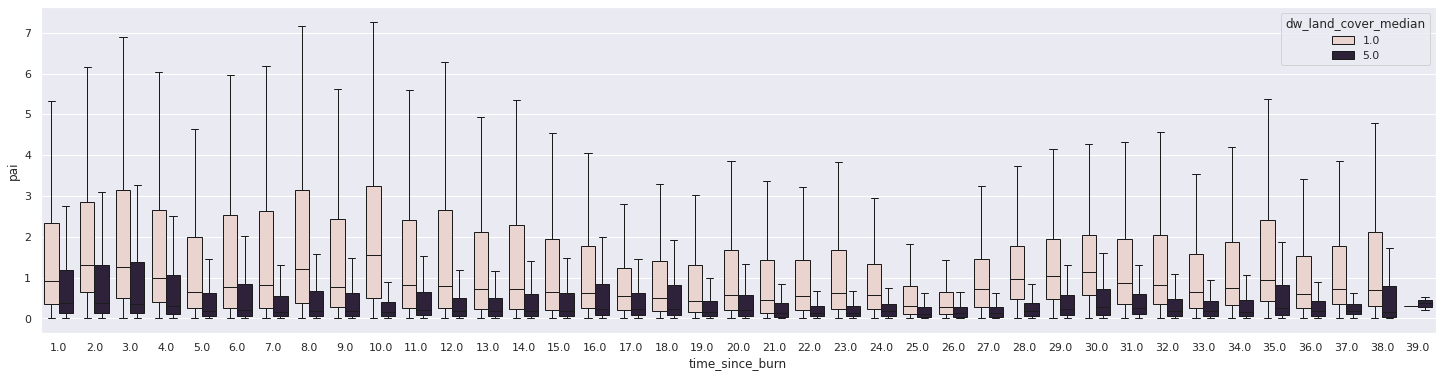

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.boxplot(gedi_burned[gedi_burned.dw_land_cover_median.isin([1, 5])], x="time_since_burn", y="pai", hue="dw_land_cover_median", showfliers=False)

<AxesSubplot: xlabel='time_since_burn', ylabel='slope_median'>

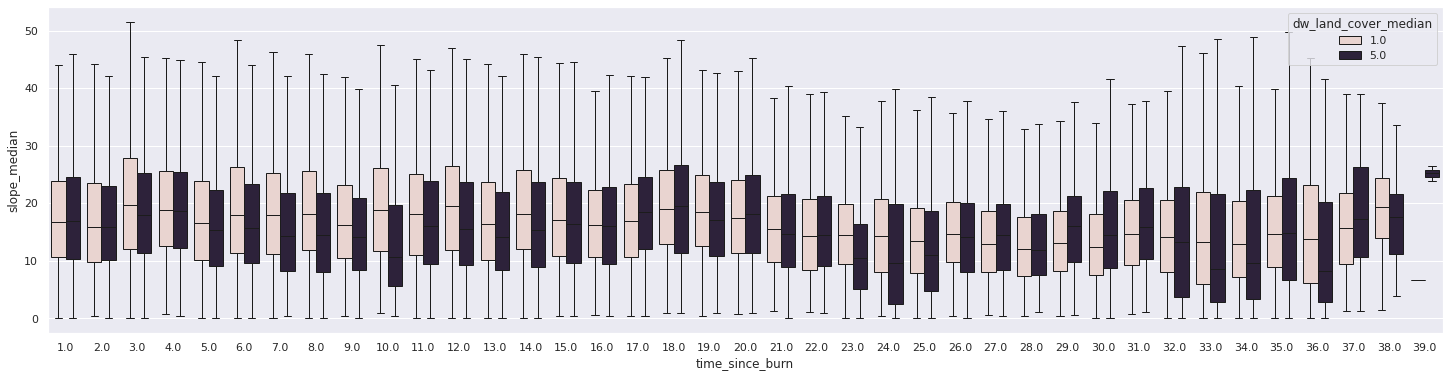

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.boxplot(gedi_burned[gedi_burned.dw_land_cover_median.isin([1, 5])], x="time_since_burn", y="slope_median", hue="dw_land_cover_median", showfliers=False)

## Density plots - estimating certainty

<AxesSubplot: xlabel='time_since_burn_cat_3', ylabel='NDVI_mean'>

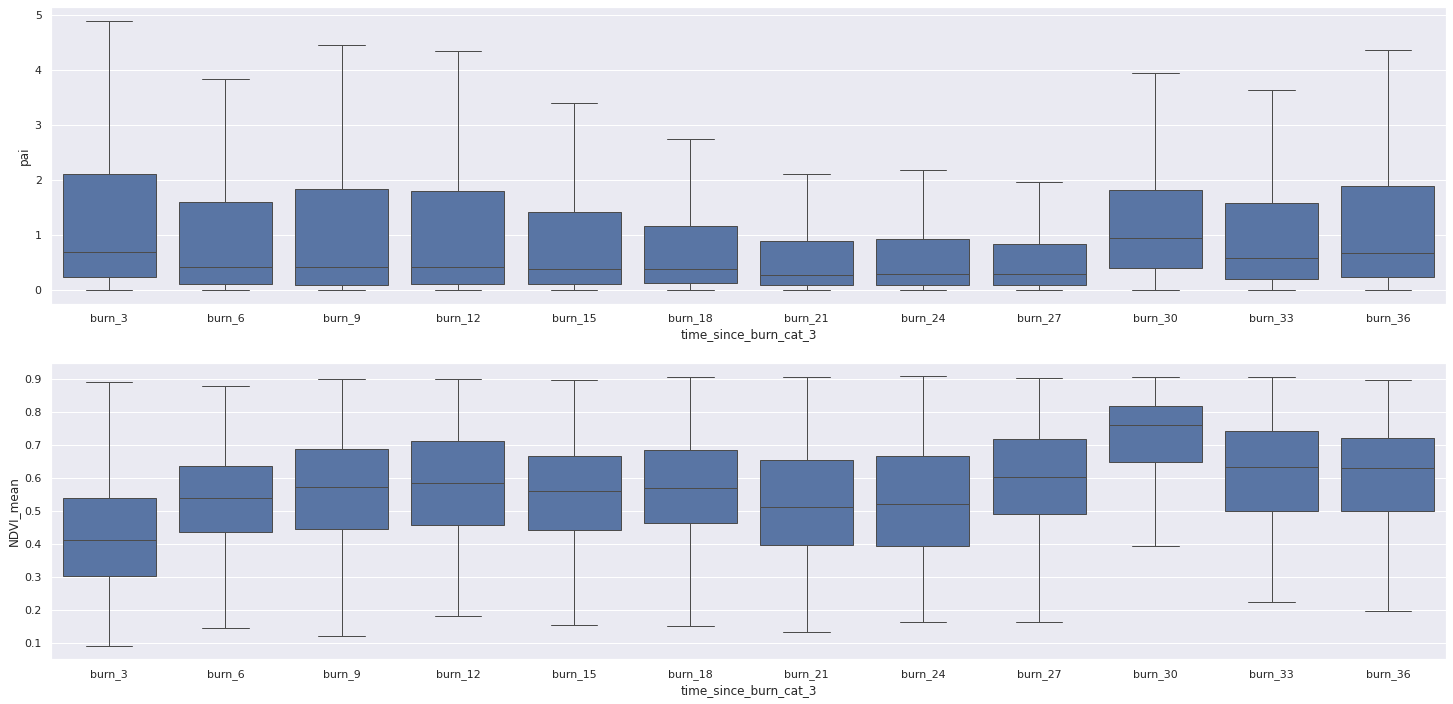

In [121]:
fig, ax = plt.subplots(2, 1, figsize=(25, 12))
df = gedi_burned
sns.boxplot(df, x="time_since_burn_cat_3", y="pai", ax=ax[0], showfliers=False)
sns.boxplot(df, x="time_since_burn_cat_3", y="NDVI_mean", ax=ax[1], showfliers=False)

<AxesSubplot: xlabel='time_since_burn_cat_3', ylabel='NDVI_mean'>

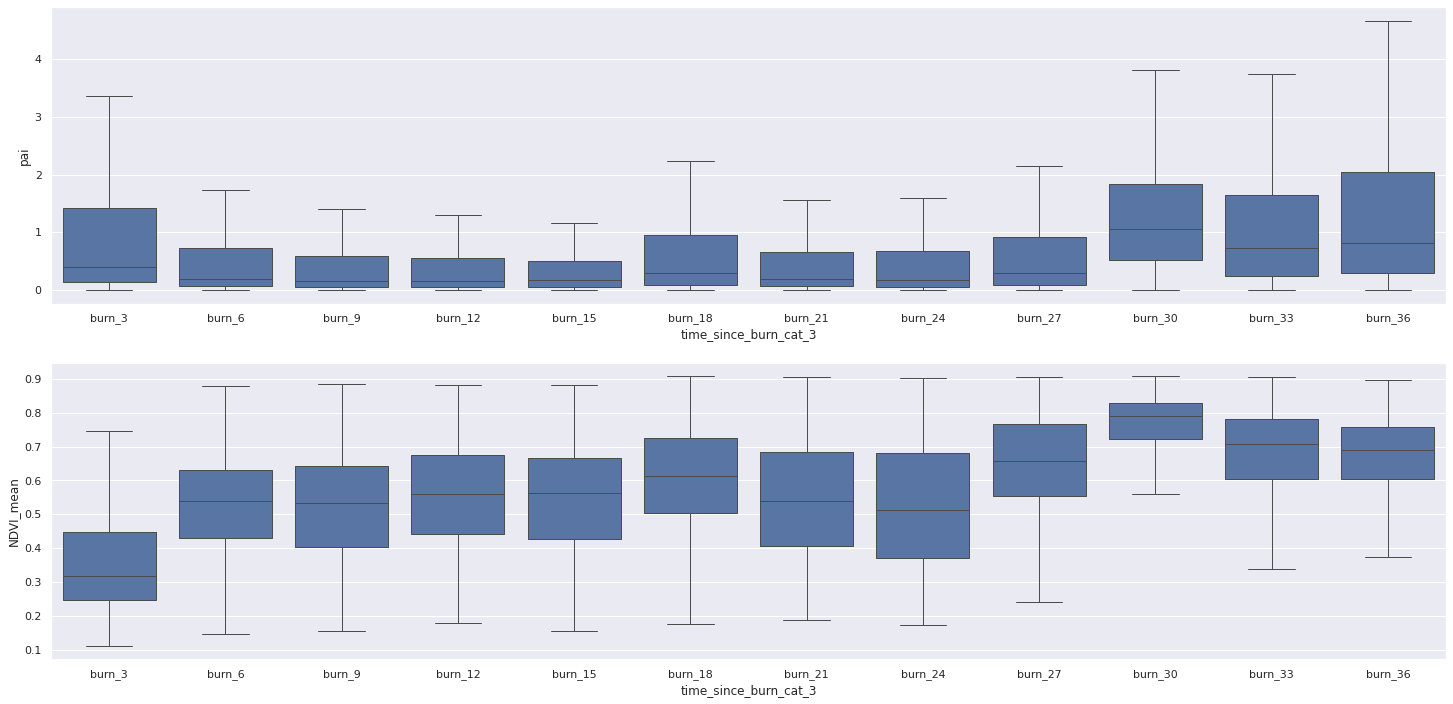

In [122]:
fig, ax = plt.subplots(2, 1, figsize=(25, 12))
df = gedi_burned[gedi_burned.severity == 4]
sns.boxplot(df, x="time_since_burn_cat_3", y="pai", ax=ax[0], showfliers=False)
sns.boxplot(df, x="time_since_burn_cat_3", y="NDVI_mean", ax=ax[1], showfliers=False)

<AxesSubplot: xlabel='time_since_burn_cat_3', ylabel='NDVI_mean'>

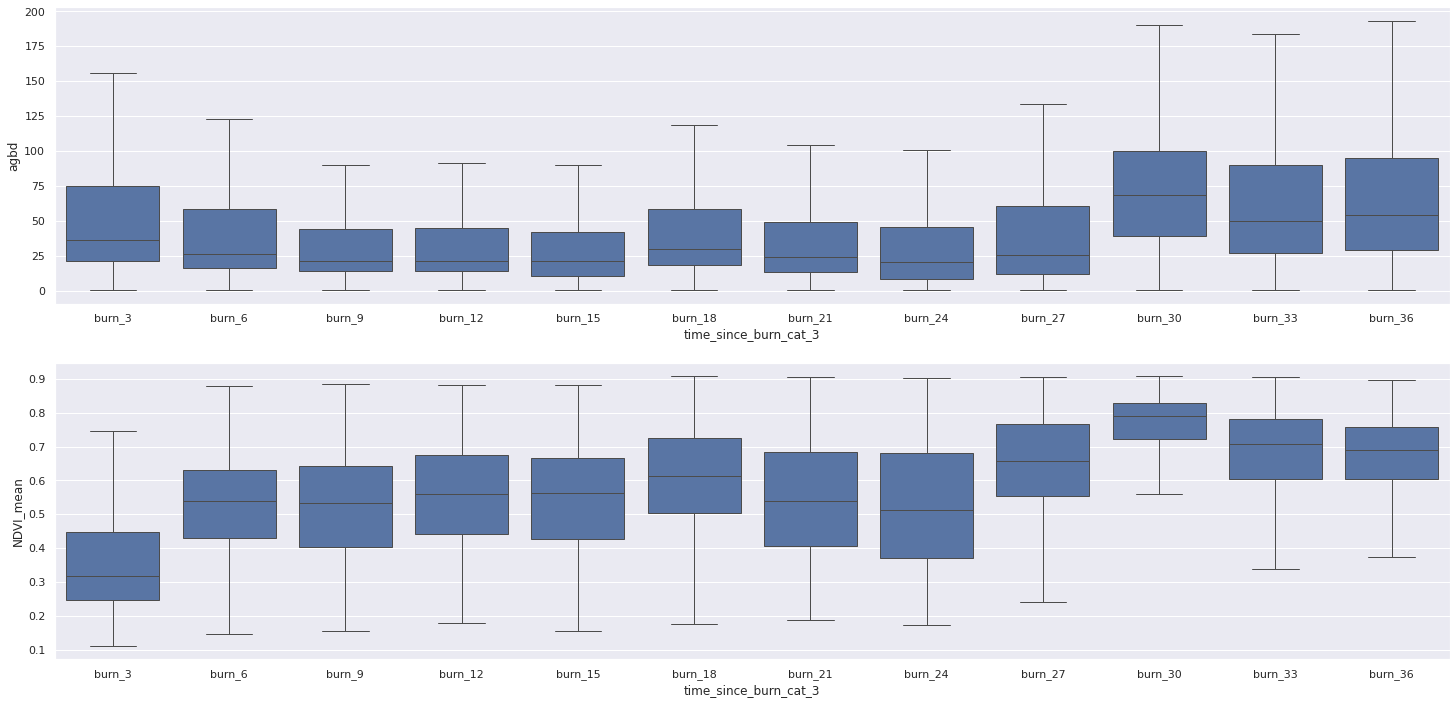

In [128]:
fig, ax = plt.subplots(2, 1, figsize=(25, 12))
df = gedi_burned[gedi_burned.severity == 4]
sns.boxplot(df, x="time_since_burn_cat_3", y="agbd", ax=ax[0], showfliers=False)
sns.boxplot(df, x="time_since_burn_cat_3", y="NDVI_mean", ax=ax[1], showfliers=False)

In [ ]:
sns.kdeplot(gedi_unburned_subset, x="NDVI_")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='dw_land_cover_std', ylabel='Count'>

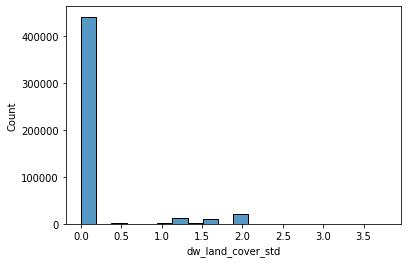

In [21]:
sns.histplot(gedi_burned, x="dw_land_cover_std")

In [22]:
print(len(gedi_burned))
print(f"Share of samples with heterogenous land cover: {len(gedi_burned[gedi_burned.dw_land_cover_std != 0])/len(gedi_burned)}")

492582
Share of samples with heterogenous land cover: 0.10307319390477118


/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='dw_land_cover_median', ylabel='Count'>

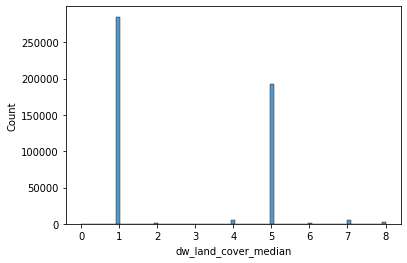

In [23]:
sns.histplot(gedi_burned, x="dw_land_cover_median")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='gridded_pft_class', ylabel='Count'>

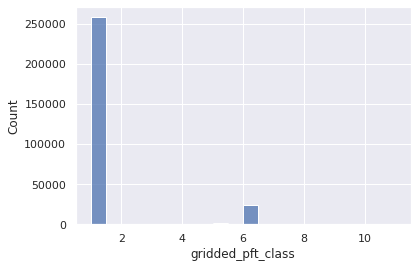

In [32]:
sns.histplot(gedi_burned[gedi_burned.dw_land_cover_median==1], x="gridded_pft_class")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='gridded_pft_class', ylabel='Count'>

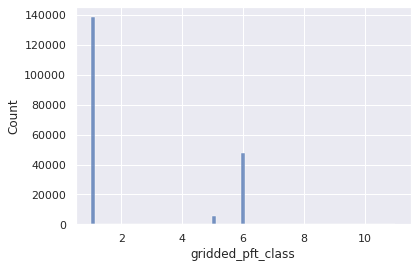

In [33]:
sns.histplot(gedi_burned[gedi_burned.dw_land_cover_median==5], x="gridded_pft_class")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

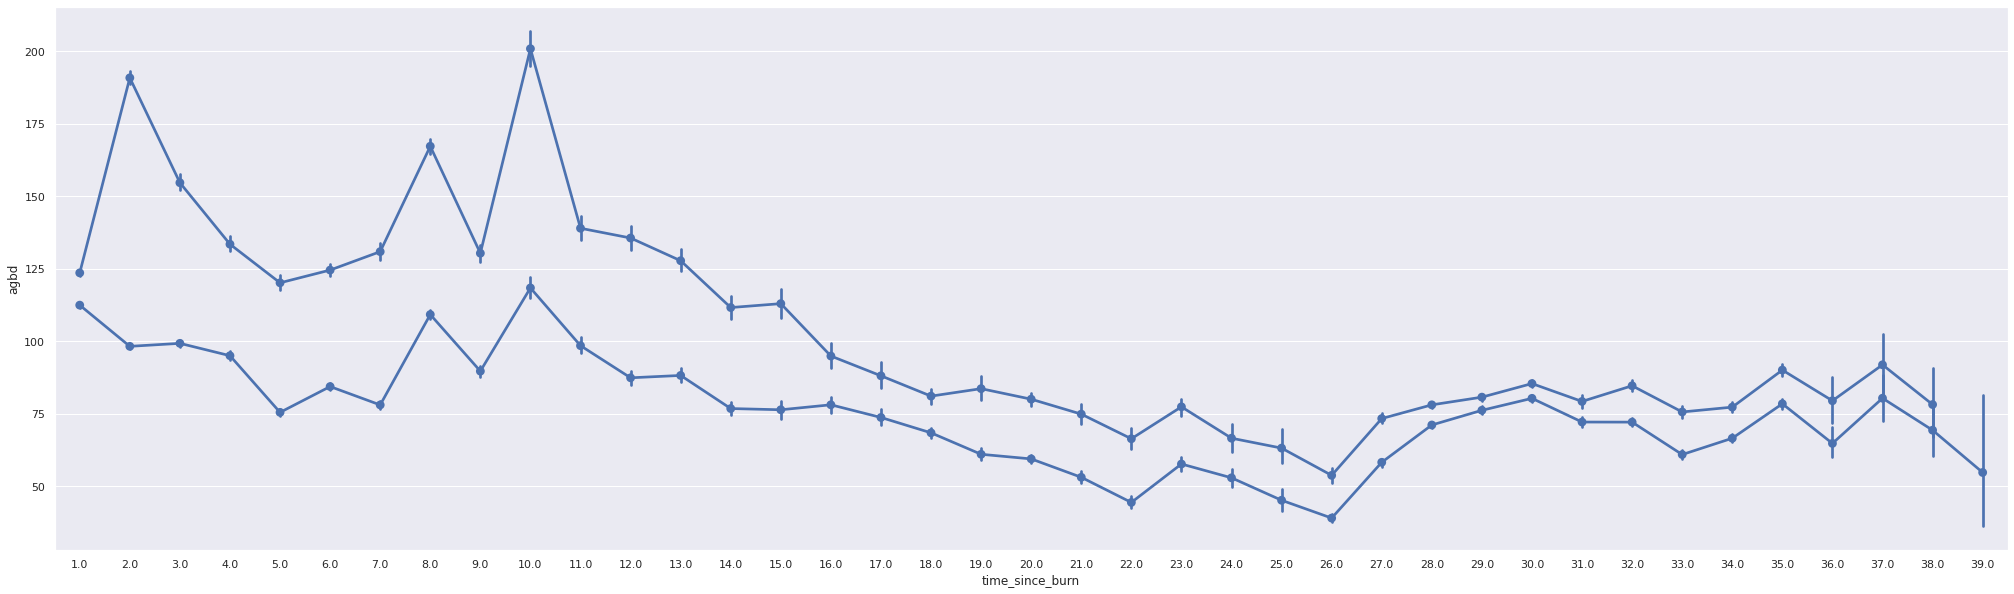

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_burned[(gedi_burned.dw_land_cover_median==1) & (gedi_burned.gridded_pft_class == 1)], x="time_since_burn", y="agbd")
sns.pointplot(gedi_burned, x="time_since_burn", y="agbd")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

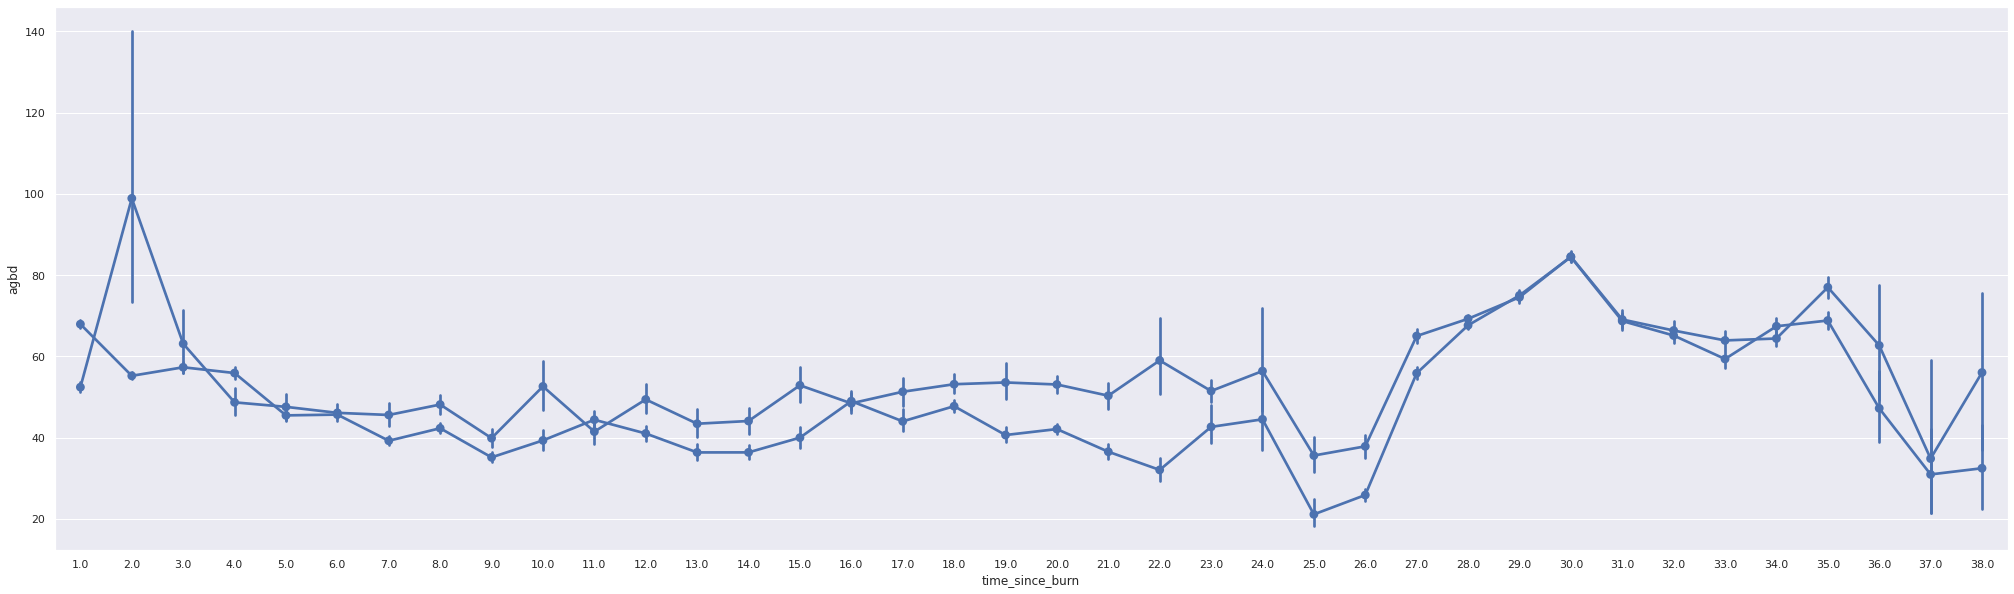

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_burned[(gedi_burned.dw_land_cover_median==1) & (gedi_burned.gridded_pft_class == 1) & (gedi_burned.severity == 4) & (gedi_burned.elevation_difference_tdx > -10)], x="time_since_burn", y="agbd")
sns.pointplot(gedi_burned[(gedi_burned.severity == 4)], x="time_since_burn", y="agbd")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

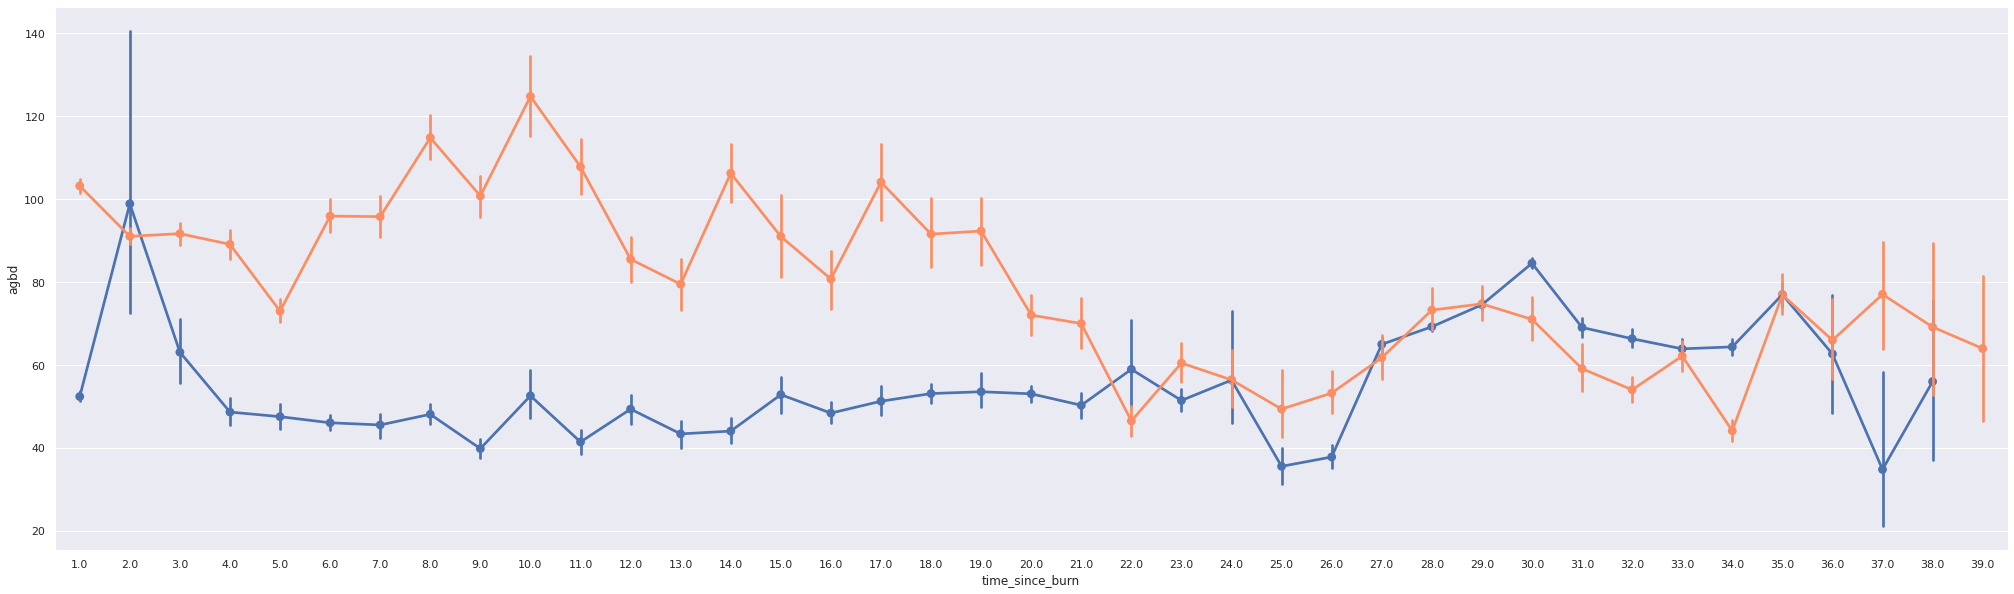

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_burned[(gedi_burned.dw_land_cover_median==1) & (gedi_burned.gridded_pft_class == 1) & (gedi_burned.severity == 4) & (gedi_burned.elevation_difference_tdx > -10)], x="time_since_burn", y="agbd")
sns.pointplot(gedi_burned[(gedi_burned.severity == 2) & (gedi_burned.solar_elevation < 0) & (gedi_burned.elevation_difference_tdx > -10)], x="time_since_burn", y="agbd", color=palette[1])

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

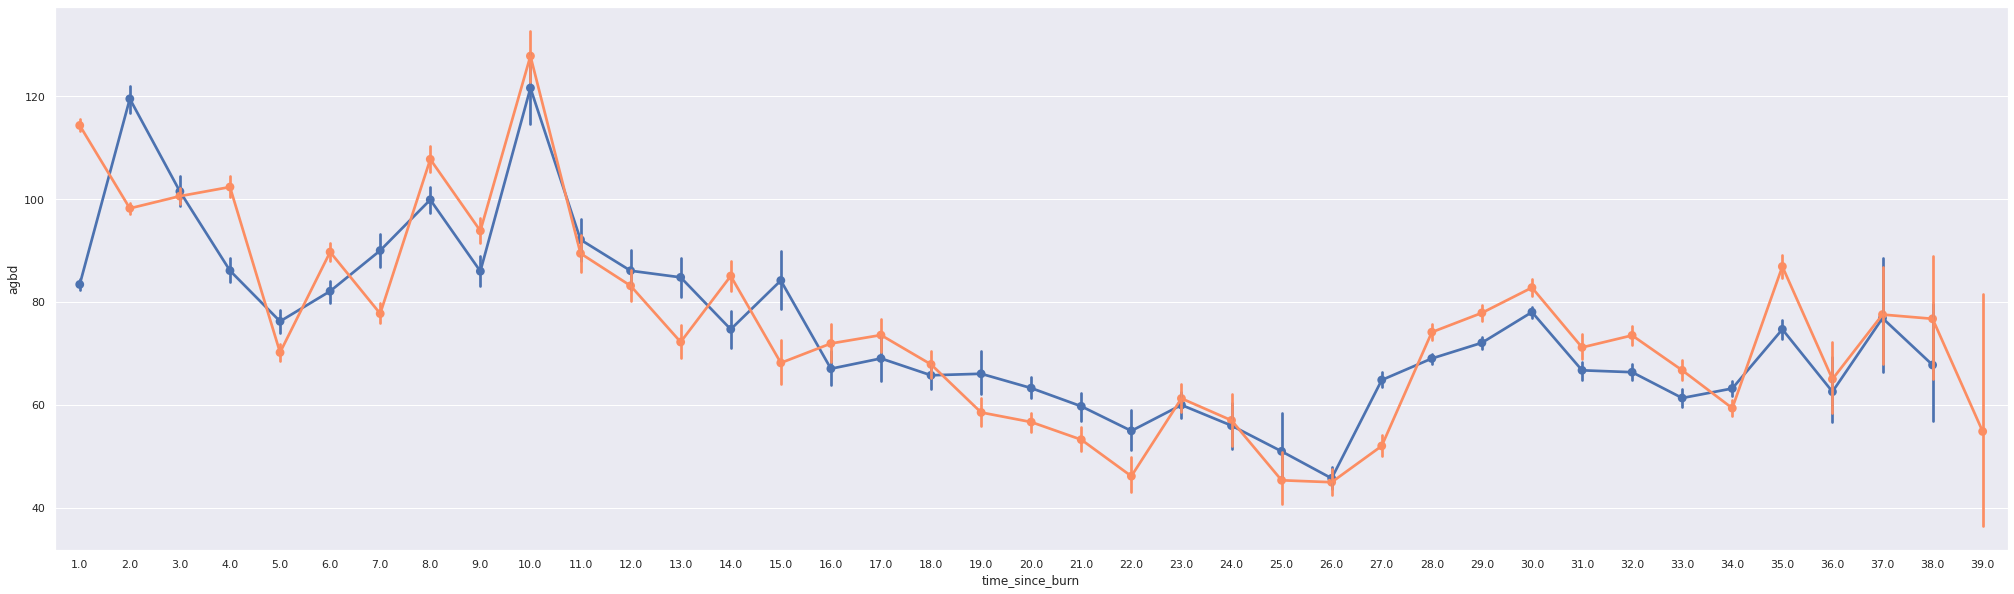

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_burned[(gedi_burned.dw_land_cover_median==1) & (gedi_burned.gridded_pft_class == 1) & (gedi_burned.elevation_difference_tdx > -10)], x="time_since_burn", y="agbd")
sns.pointplot(gedi_burned[ (gedi_burned.solar_elevation < 0)], x="time_since_burn", y="agbd", color=palette[1])

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<AxesSubplot: xlabel='time_since_burn', ylabel='slope_median'>

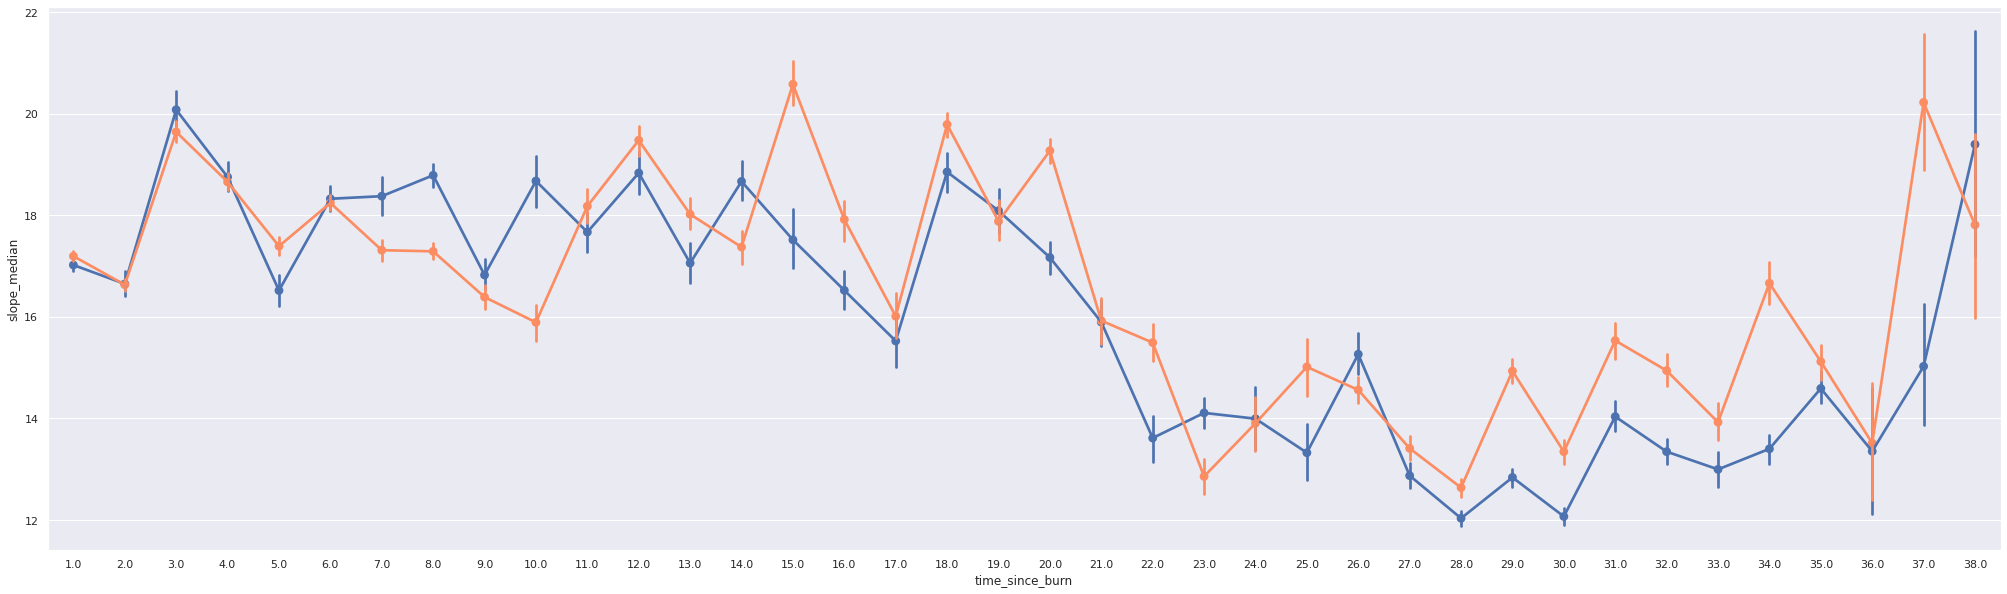

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_burned[(gedi_burned.dw_land_cover_median==1) & (gedi_burned.gridded_pft_class == 1) & (gedi_burned.elevation_difference_tdx > -10)], x="time_since_burn", y="slope_median")
sns.pointplot(gedi_burned[ (gedi_burned.solar_elevation > 0)], x="time_since_burn", y="slope_median", color=palette[1])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_burned[gedi_burned.dw_land_cover_median==1], x="time_since_burn", y="agbd")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot: xlabel='time_since_burn', ylabel='agbd'>

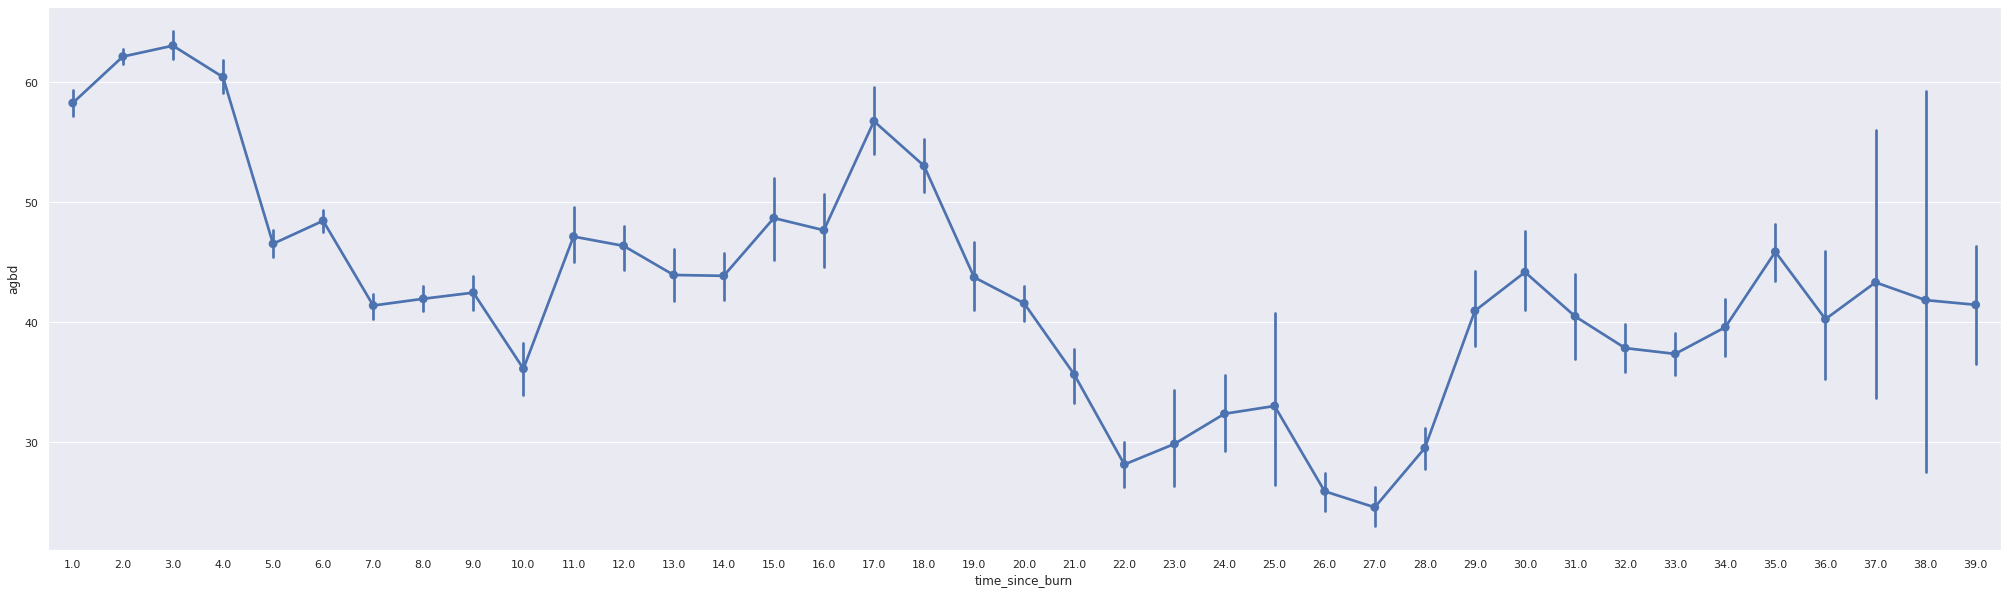

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_burned[gedi_burned.dw_land_cover_median==5], x="time_since_burn", y="agbd")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot: xlabel='time_since_burn', ylabel='NDVI_mean'>

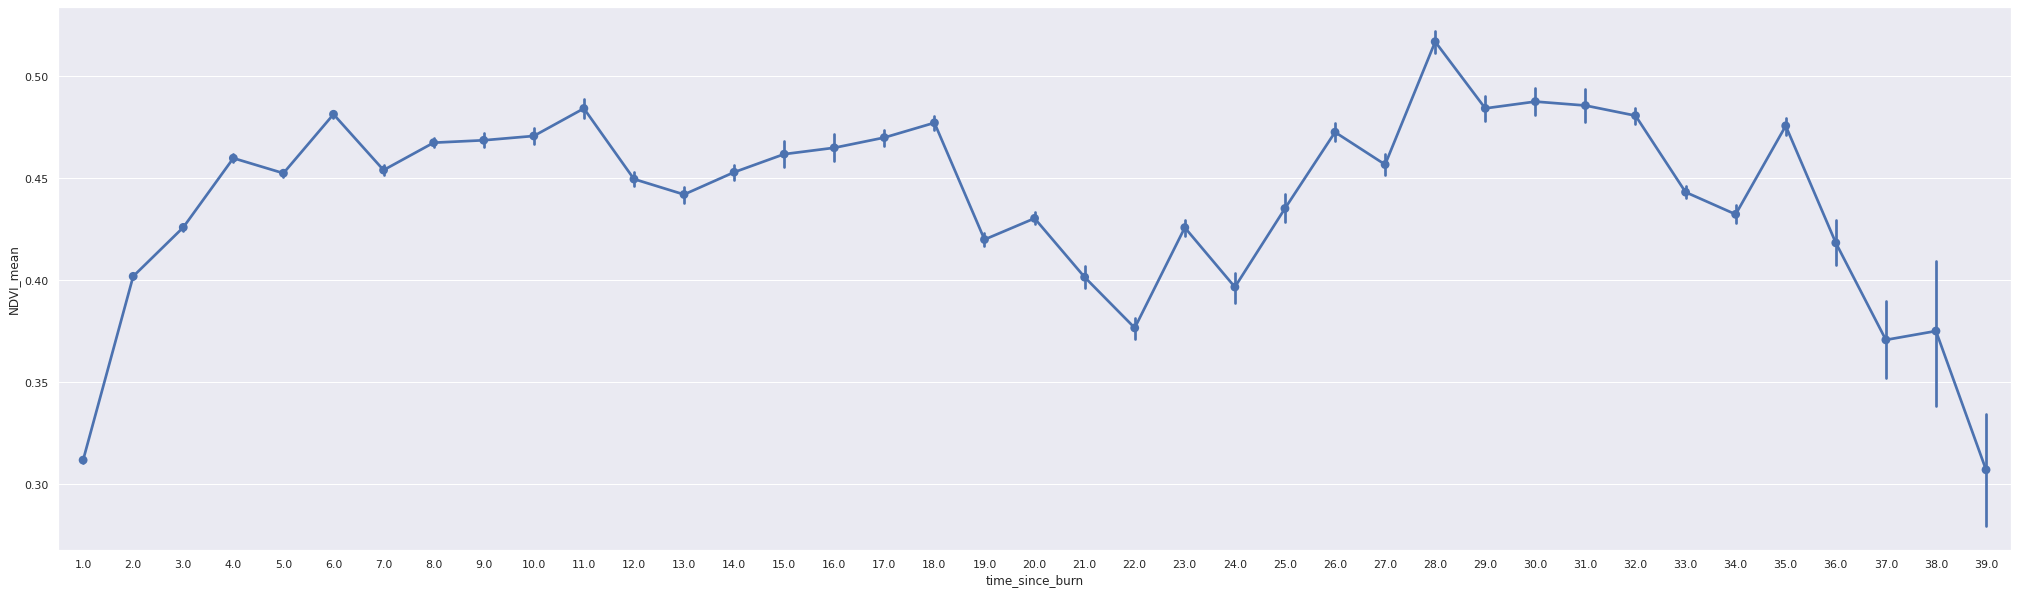

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_burned[gedi_burned.dw_land_cover_median==5], x="time_since_burn", y="NDVI_mean")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot: xlabel='time_since_burn', ylabel='NDVI_mean'>

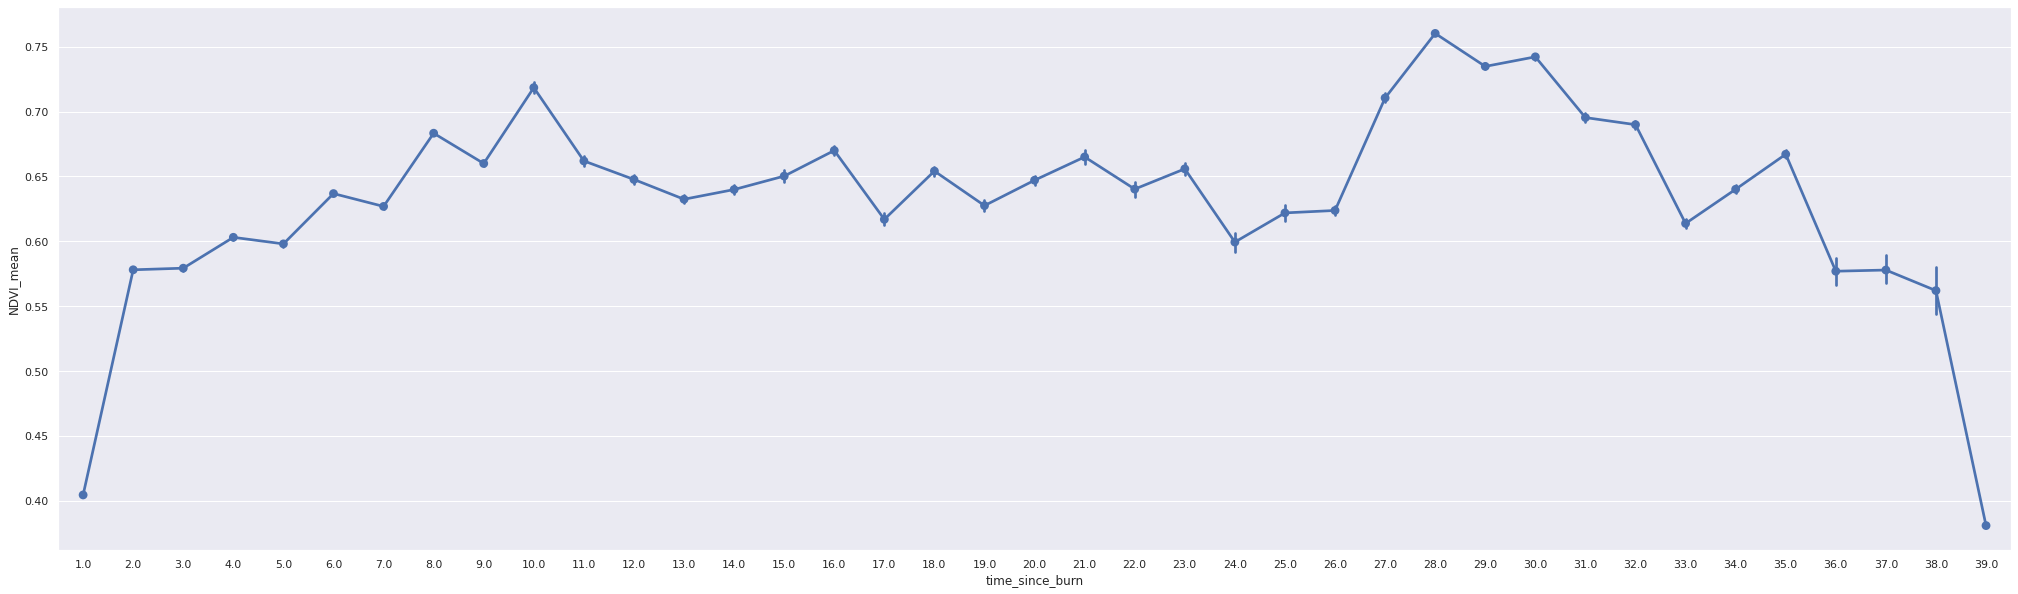

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_burned[gedi_burned.dw_land_cover_median==1], x="time_since_burn", y="NDVI_mean")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='time_since_burn', ylabel='Count'>

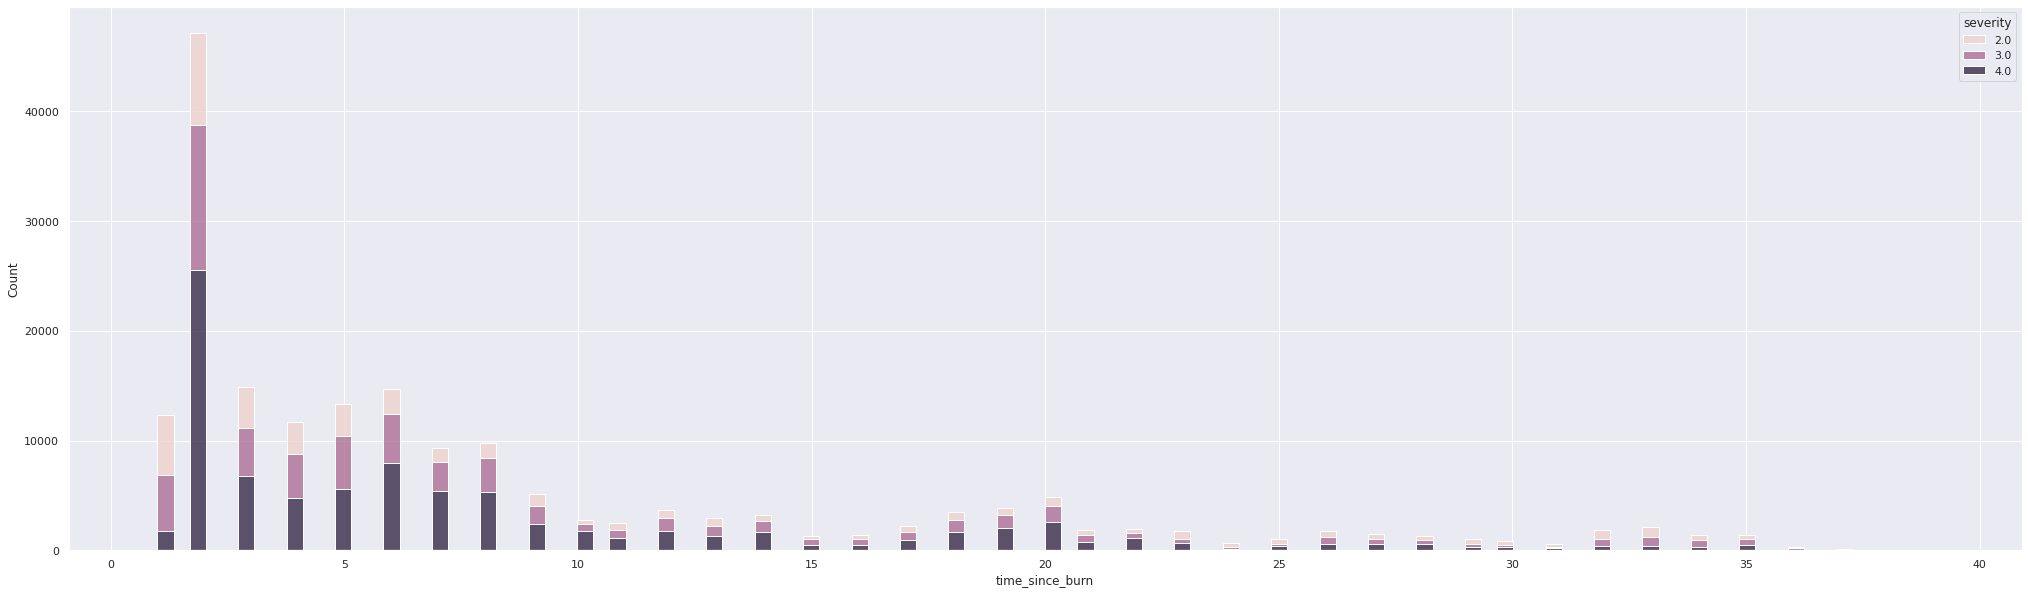

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.histplot(gedi_burned[gedi_burned.dw_land_cover_median==5], x="time_since_burn", hue="severity", multiple="stack")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='time_since_burn', ylabel='Count'>

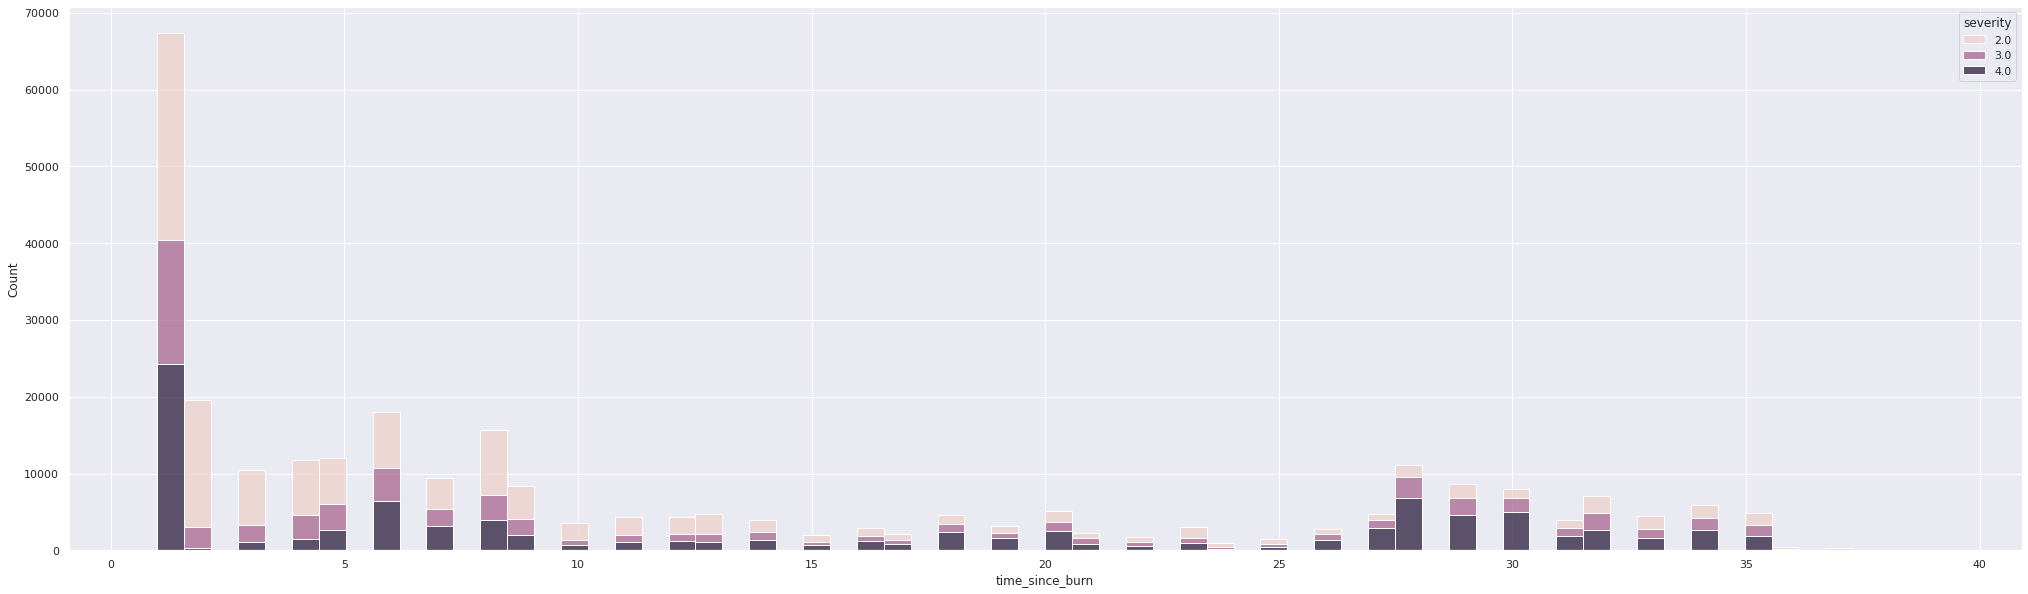

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.histplot(gedi_burned[gedi_burned.dw_land_cover_median==1], x="time_since_burn", hue="severity", multiple="stack")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='time_since_burn', ylabel='Count'>

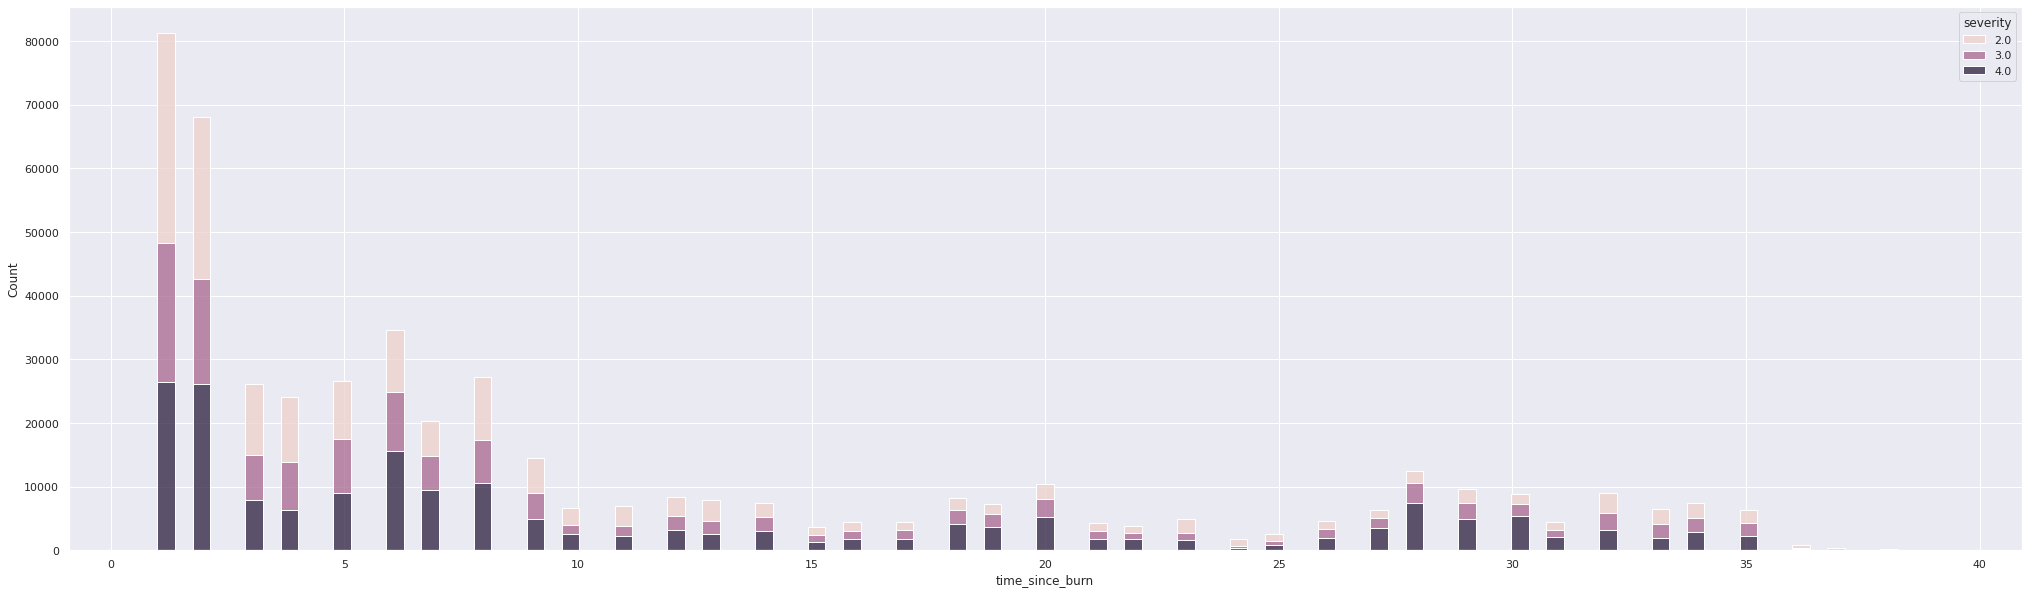

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.histplot(gedi_burned, x="time_since_burn", hue="severity", multiple="stack")

/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jk871/drought-with-gedi/drought/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='solar_elevation', ylabel='Count'>

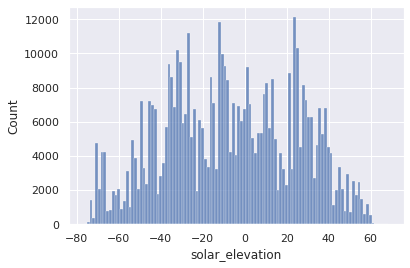

In [43]:
sns.histplot(gedi_burned, x="solar_elevation")